# ABOUT HOUSING: PRICE PREDICTION

# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

# Technical Requirements:

 Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets

In [5]:
# Let's import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#uploading test dataset
test=pd.read_csv("Housing_test.csv")
train=pd.read_csv("Housing_train.csv")


In [7]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA   

In [8]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

In [9]:
print(test.shape)
print('*************')
print(train.shape)

(292, 80)
*************
(1168, 81)


test dataset has Row-292 and Column-81

train dataset has Row-1168 and Column-80

In [10]:
#Drop the ID column since it is unnecessary for the prediction process
train.drop("Id",axis =1,inplace = True)
test.drop("Id",axis =1,inplace= True)

In [11]:
print(test.shape)
print('*************')
print(train.shape)

(292, 79)
*************
(1168, 80)


As we can see that we sucessfully dropped column "ID" from both dataset

In [12]:
#lets check the null value in both dataset
print(test.isnull().sum())
print('*****************')
print(train.isnull().sum())

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 79, dtype: int64
*****************
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


As we can see that there are so many null values so we have to fill the null values

In [13]:
# Let's display all columns with null values and their respective null values count

housing_nan=pd.DataFrame(train[train.columns[train.isnull().any()]].isnull().sum())
housing_nan.columns=['null_values']

housing_nan

null_values
LotFrontage           214
Alley                1091
MasVnrType              7
MasVnrArea              7
BsmtQual               30
BsmtCond               30
BsmtExposure           31
BsmtFinType1           30
BsmtFinType2           31
FireplaceQu           551
GarageType             64
GarageYrBlt            64
GarageFinish           64
GarageQual             64
GarageCond             64
PoolQC               1161
Fence                 931
MiscFeature          1124

In [14]:
# Let's display all columns with null values and their respective null values count

housing_nan=pd.DataFrame(test[test.columns[test.isnull().any()]].isnull().sum())
housing_nan.columns=['null_values']

housing_nan

null_values
LotFrontage            45
Alley                 278
MasVnrType              1
MasVnrArea              1
BsmtQual                7
BsmtCond                7
BsmtExposure            7
BsmtFinType1            7
BsmtFinType2            7
Electrical              1
FireplaceQu           139
GarageType             17
GarageYrBlt            17
GarageFinish           17
GarageQual             17
GarageCond             17
PoolQC                292
Fence                 248
MiscFeature           282

In [15]:
print ("Train data: \n")
print ("Number of columns: " + str (train.shape[1]))
print ("number of rows: " + str (train.shape[0]))

print('\nTest data: \n')
print ("number of columns:" + str (test.shape[1]))
print ("Number of columns:" +  str (test.shape[0]))

Train data: 

Number of columns: 80
number of rows: 1168

Test data: 

number of columns:79
Number of columns:292


In [16]:
#letscheck columns name of both dataset
print(train.columns)
print("**********")
print(test.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [17]:
#check information of train and test dataset to find null values and type of columns
print(test.info())
print('**********************')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          14 non-null     object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

In [18]:
print(test.dtypes)
print('**************')
print(train.dtypes)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object
**************
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object


Observation:
There are two types of data present in the dataset categorical and numerical.

In [19]:
# Let's explore the categorical columns

for column in train.columns:
    if train[column].dtypes == object:
        print(str(column) + ' : ' + str(train[column].unique()))
        print(train[column].value_counts())
        print('\n')

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street : ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley : [nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities : ['AllPub']
AllPub    1168
Name: Utilities, dtype: int64


LotConfig : ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope : ['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood : ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDal

1.There is only one unique value present in utilities column so we will be dropping this column.

2. In categorical columns there are missing values present in coumns Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

# Handling Missing Values

Handle missing values in train dataset

In [20]:
# Let's check the missing values of top 30 columns
print(train.isnull().values.any())
print("********************")
print(train.isnull().sum().sort_values(ascending = False).head(30))
print("******************************************")
print(test.isnull().sum().sort_values(ascending = False).head(30))


True
********************
PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
GarageYrBlt       64
BsmtExposure      31
BsmtFinType2      31
BsmtCond          30
BsmtFinType1      30
BsmtQual          30
MasVnrArea         7
MasVnrType         7
RoofStyle          0
RoofMatl           0
ExterQual          0
Exterior1st        0
Exterior2nd        0
YearBuilt          0
ExterCond          0
Foundation         0
YearRemodAdd       0
SalePrice          0
OverallCond        0
OverallQual        0
dtype: int64
******************************************
PoolQC          292
MiscFeature     282
Alley           278
Fence           248
FireplaceQu     139
LotFrontage      45
GarageCond       17
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageQual       17
BsmtFinType1      7
BsmtExposure      7
BsmtCond          7
BsmtQual

Observation:

In train dataset There are 18 columns that have missing values. Major missing values columns are PoolQC, 1124-in MiscFeature, 11091-in Alley, 931-in Fence, 551-in FireplaceQu
    
There are 1161-missing values in the column PoolQC, 1124-in MiscFeature, 11091-in Alley, 931-in Fence, 551-in FireplaceQu,214- in LotFrontage, 64-each in GarageType, GarageCond, GarageYrBlt, GarageFinish, GarageQual, 31-in BsmtExposure and BsmtFinType2, 30-in BsmtCond and BsmtQual, 7-in MasVnrArea and MasVnrType present in our dataset.



IN test Dataset There are 19 columns that have missing values. Major missing values columns are 
PoolQC          292
MiscFeature     282
Alley           278
Fence           248
FireplaceQu     139

In [21]:
# Let's check the percentage of missing values of each column

def missing_values_table(train):
    mis_val = train.isnull().sum()
    mis_val_percent = 100 * train.isnull().sum() / len(train)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(train.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(train)

Your selected dataframe has 80 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
PoolQC                  1161               99.4
MiscFeature             1124               96.2
Alley                   1091               93.4
Fence                    931               79.7
FireplaceQu              551               47.2
LotFrontage              214               18.3
GarageType                64                5.5
GarageYrBlt               64                5.5
GarageFinish              64                5.5
GarageQual                64                5.5
GarageCond                64                5.5
BsmtExposure              31                2.7
BsmtFinType2              31                2.7
BsmtCond                  30                2.6
BsmtFinType1              30                2.6
BsmtQual                  30                2.6
MasVnrArea                 7                0.6
MasVnrType                 7                0.6

In [22]:

# Let's check the percentage of missing values of each column

def missing_values_table(test):
    mis_val = test.isnull().sum()
    mis_val_percent = 100 * test.isnull().sum() / len(test)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(test.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(test)

Your selected dataframe has 79 columns.
There are 19 columns that have missing values.


Missing Values  % of Total Values
PoolQC                   292              100.0
MiscFeature              282               96.6
Alley                    278               95.2
Fence                    248               84.9
FireplaceQu              139               47.6
LotFrontage               45               15.4
GarageType                17                5.8
GarageYrBlt               17                5.8
GarageFinish              17                5.8
GarageQual                17                5.8
GarageCond                17                5.8
BsmtExposure               7                2.4
BsmtFinType1               7                2.4
BsmtFinType2               7                2.4
BsmtCond                   7                2.4
BsmtQual                   7                2.4
MasVnrArea                 1                0.3
MasVnrType                 1                0.3
Electrical                 1                0.3

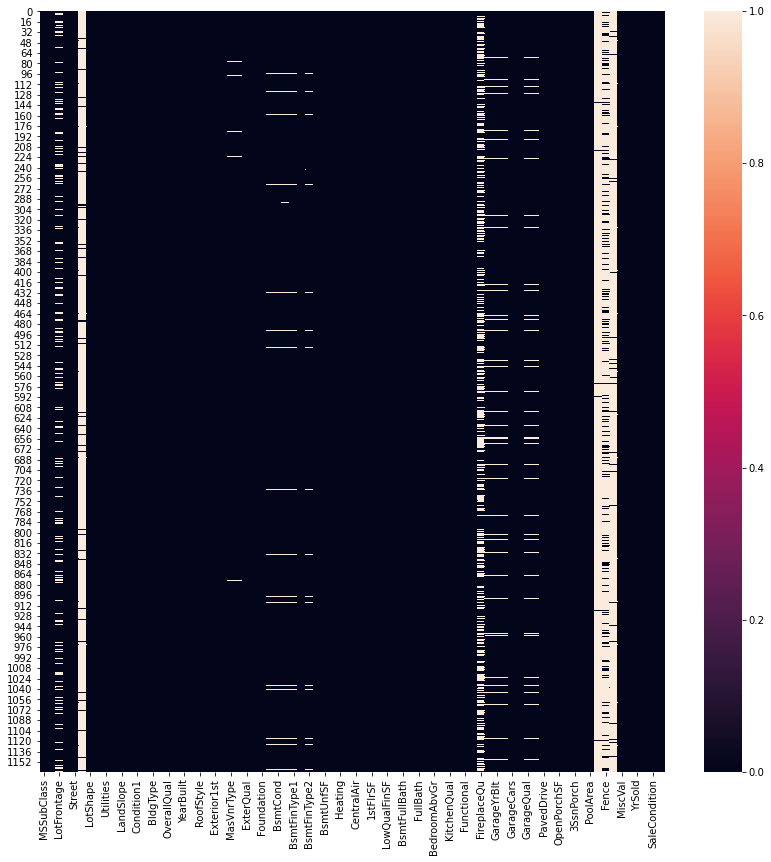

In [23]:
#lets Visualize the missing values with the help of Heatmap
plt.figure(figsize=(14,14))
sns.heatmap(train.isnull());

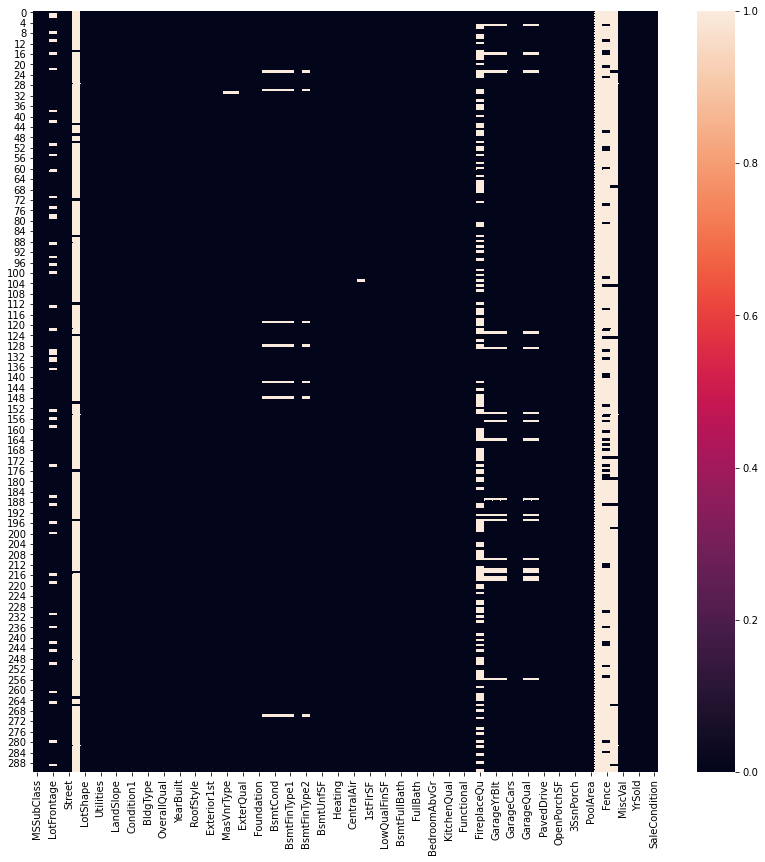

In [24]:
#lets Visualize the missing values with the help of Heatmap
plt.figure(figsize=(14,14))
sns.heatmap(test.isnull());

In [25]:
# Let's fill the missing values in categorical columns as NA in train dataset

columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
train[columns] = train[columns].fillna('NA')

# Let's fill the missing values in MasVnrType with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')

# Let's fill the missing values in GarageYrBlt with 0
train['GarageYrBlt'] = train['GarageYrBlt'].fillna('0')

# Let's Imputing the missing values and replace it with the median
train['LotFrontage'].fillna(train['LotFrontage'].median(),inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].median(),inplace=True)



In [26]:
# Let's fill the missing values in categorical columns as NA in test dataset

columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
test[columns] = test[columns].fillna('NA')

# Let's fill the missing values in MasVnrType with None
test['MasVnrType'] = test['MasVnrType'].fillna('None')

# Let's fill the missing values in GarageYrBlt with 0
test['GarageYrBlt'] = test['GarageYrBlt'].fillna('0')

# Let's Imputing the missing values and replace it with the median
test['LotFrontage'].fillna(test['LotFrontage'].median(),inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].median(),inplace=True)

# Statistical Apporch

In [27]:
# Let's check the statistical summary of our dataset
train.describe()


MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.807363   10484.749144     6.104452     5.595890   
std      41.940650    22.440317    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.000000    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260   
std      30.145255     20.785185   182.218483   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       2.884418      1.045377      6.542808     0.617295     1.776541   
std        0.817229      0.216292      1.598484     0.650575     0.745554   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    476.860445    96.206336    46.559932      23.015411     3.639555   
std     214.466769   126.158988    66.381023      63.191089    29.088867   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     338.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    24.000000       0.000000     0.000000   
75%     576.000000   171.000000    70.000000       0.000000 

1. Maximum standard deviation of 8957.44 is observed in LotArea column.

2.Maximum SalePrice of a house observed is 755000 and minimum is 34900.

3. In the columns Id, MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.

4. In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.

5. In the columns Id, MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

In [28]:
# Let's check the correlation

train_cor=train.corr()
train_cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.336234 -0.124151     0.070462    -0.056978   
LotFrontage     -0.336234     1.000000  0.296790     0.229981    -0.047851   
LotArea         -0.124151     0.296790  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.229981  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.047851  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.112000  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.089513  0.027228     0.555945     0.080669   
MasVnrArea       0.028215     0.188273  0.120192     0.403985    -0.135133   
BsmtFinSF1      -0.052236     0.227732  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403     0.001253  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.115628  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.356180  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.402864  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.089816  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.008087 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.374000  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.092807  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001375  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.171842  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.047149  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.236946  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002082 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.318941  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.228494  0.285983     0.390067    -0.013632   
GarageCars      -0.027639     0.260224  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.322750  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.087267  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.151044  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.021103 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.050499  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.030440  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.195973  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.002830  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.022579  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.004162 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.323851  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.023988      0.056618    0.028215   -0.052236   -0.062403   
LotFrontage     0.112000      0.089513    0.188273    0.227732    0.001253   
LotArea         0.005506      0.027228    0.120192    0.221851    0.056656   
OverallQual     0.575800      0.555945    0.403985    0.219643   -0.040893   
OverallCond    -0.377731      0.080669   -0.135133   -0.028810    0.044336   
YearBuilt       1.000000      0.592829    0.318562    0.227933   -0.027682   
YearRemodAdd    0.592829      1.000000    0.178583    0.114430   -0.044694   
MasVnrArea      0.318562      0.178583    1.000000    0.263377   -0.064685   
BsmtFinSF1      0.227933      0.114430    0.263377    1.000000   -0.052145   
BsmtFinSF2     -0.027682     -0.044694   -0.064685   -0.052145    1.000000   
BsmtUnfSF       0.155559      0.174732    0.108974   -0.499861   -0.213580   
TotalBsmtSF     0.386265      0.280720    0.362330    0.518940    0.098167   
1stFlrSF        0.279450      0.233384    0.334512    0.445876    0.093442   
2ndFlrSF        0.011834      0.1551

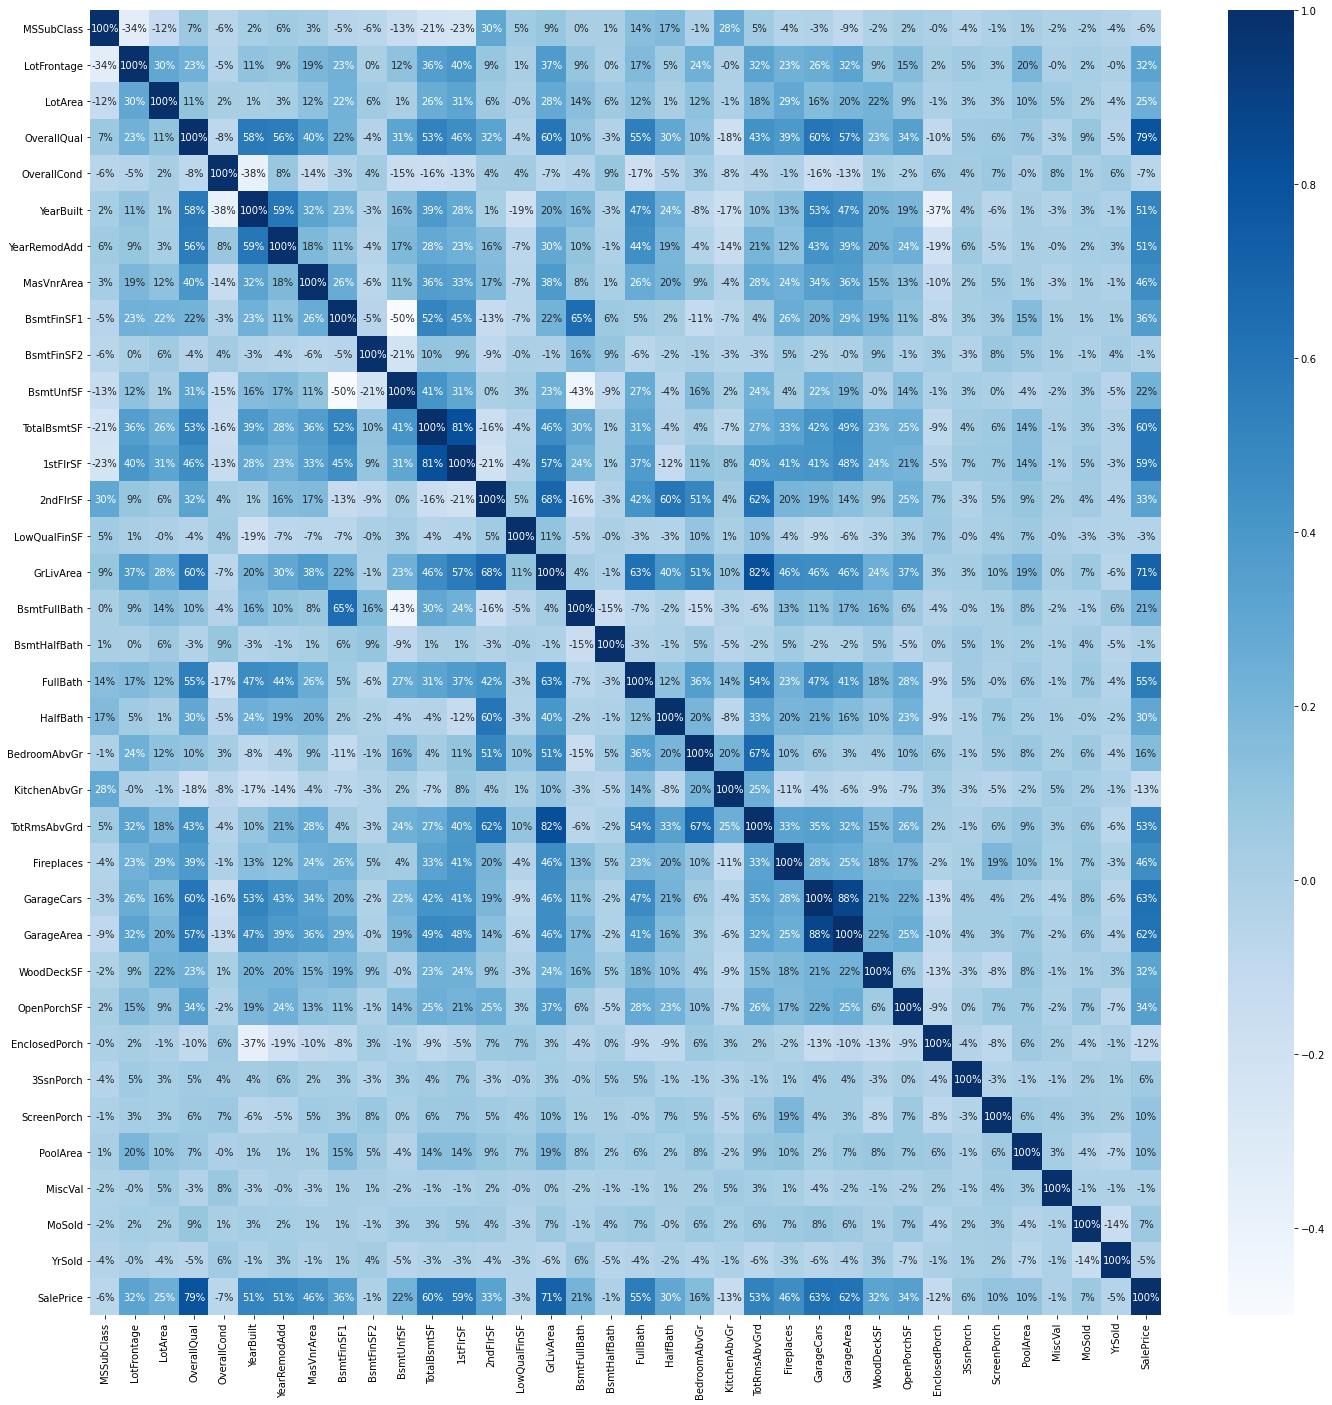

In [29]:
# Let's plot the heat map

plt.figure(figsize=(24,24))
sns.heatmap(train_cor,annot=True,fmt='.0%',cmap='Blues')
plt.show()

1.SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

2.SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

3.We observe multicollinearity in between columns so we will be using Principal Component Analysis(PCA).

In [30]:
# Let's check the correlation

test_cor=test.corr()
test_cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.455118 -0.186654    -0.116077    -0.068113   
LotFrontage     -0.455118     1.000000  0.368894     0.254412    -0.098109   
LotArea         -0.186654     0.368894  1.000000     0.109161    -0.071113   
OverallQual     -0.116077     0.254412  0.109161     1.000000    -0.131891   
OverallCond     -0.068113    -0.098109 -0.071113    -0.131891     1.000000   
YearBuilt        0.041932     0.144278  0.037757     0.560092    -0.366830   
YearRemodAdd    -0.023317     0.056412 -0.022957     0.528983     0.045747   
MasVnrArea       0.004589     0.132992  0.062992     0.422236    -0.081386   
BsmtFinSF1      -0.142908     0.149789  0.209632     0.328421    -0.126968   
BsmtFinSF2      -0.079328     0.244537  0.277855    -0.139583     0.021459   
BsmtUnfSF       -0.169129     0.165133 -0.029717     0.306051    -0.095575   
TotalBsmtSF     -0.336822     0.399245  0.283111     0.578468    -0.213289   
1stFlrSF        -0.350270     0.463678  0.286714     0.553431    -0.197177   
2ndFlrSF         0.338926    -0.016179  0.030128     0.205253    -0.006572   
LowQualFinSF     0.012343     0.203730  0.030371     0.016101    -0.071717   
GrLivArea        0.030615     0.332682  0.231721     0.565494    -0.151462   
BsmtFullBath    -0.000676     0.085007  0.212162     0.150559    -0.121640   
BsmtHalfBath    -0.041577    -0.048656  0.020883    -0.076885     0.230622   
FullBath         0.095903     0.228040  0.141118     0.558577    -0.288175   
HalfBath         0.213601     0.033166  0.034980     0.177858    -0.103079   
BedroomAbvGr    -0.061750     0.227991  0.134990     0.108994    -0.061694   
KitchenAbvGr     0.275461    -0.008798 -0.030264    -0.205815    -0.128606   
TotRmsAbvGrd     0.002973     0.330678  0.211624     0.409677    -0.133094   
Fireplaces      -0.084663     0.250028  0.250416     0.425392    -0.071834   
GarageCars      -0.086798     0.305048  0.154919     0.618763    -0.291486   
GarageArea      -0.122536     0.315417  0.152737     0.542729    -0.269860   
WoodDeckSF       0.028190     0.001905  0.059117     0.288506    -0.078167   
OpenPorchSF     -0.097449     0.074465  0.067269     0.175569    -0.065010   
EnclosedPorch   -0.047570    -0.057191 -0.055667    -0.195240     0.137325   
3SsnPorch       -0.045672     0.112394  0.007832    -0.031605    -0.038308   
ScreenPorch     -0.072139     0.068126  0.090367     0.086383    -0.003167   
PoolArea              NaN          NaN       NaN          NaN          NaN   
PoolQC                NaN          NaN       NaN          NaN          NaN   
MiscVal          0.137542     0.031686 -0.020398    -0.099852     0.019495   
MoSold          -0.004079    -0.043509 -0.034709    -0.008545    -0.043722   
YrSold           0.044441     0.058555  0.041735     0.061736    -0.001908   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.041932     -0.023317    0.004589   -0.142908   -0.079328   
LotFrontage     0.144278      0.056412    0.132992    0.149789    0.244537   
LotArea         0.037757     -0.022957    0.062992    0.209632    0.277855   
OverallQual     0.560092      0.528983    0.422236    0.328421   -0.139583   
OverallCond    -0.366830      0.045747   -0.081386   -0.126968    0.021459   
YearBuilt       1.000000      0.593138    0.281914    0.343374   -0.140391   
YearRemodAdd    0.593138      1.000000    0.166959    0.191460   -0.170299   
MasVnrArea      0.281914      0.166959    1.000000    0.252429   -0.101083   
BsmtFinSF1      0.343374      0.191460    0.252429    1.000000   -0.040759   
BsmtFinSF2     -0.140391     -0.170299   -0.101083   -0.040759    1.000000   
BsmtUnfSF       0.122930      0.211142    0.137406   -0.474047   -0.189330   
TotalBsmtSF     0.416016      0.336976    0.352131    0.538182    0.134576   
1stFlrSF        0.299125      0.274479    0.368448    0.446604    0.114096   
2ndFlrSF        0.005011      0.0757

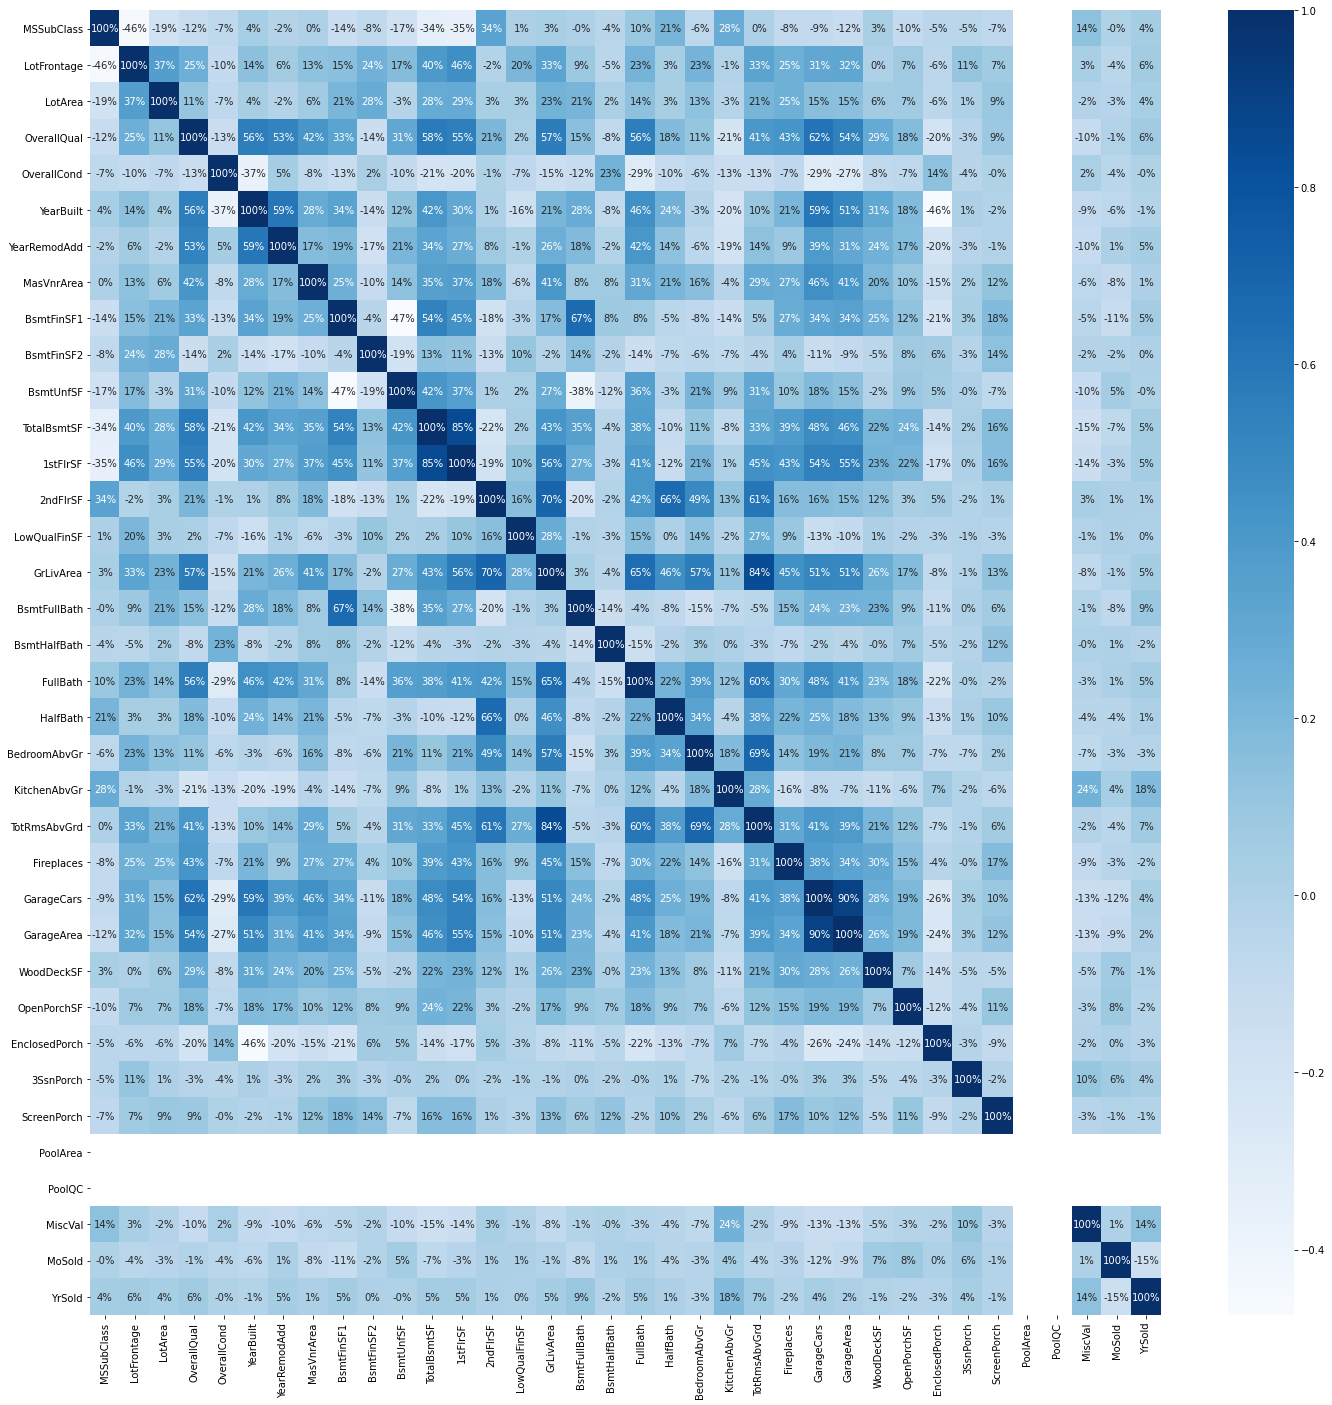

In [31]:
# Let's plot the heat map

plt.figure(figsize=(24,24))
sns.heatmap(test_cor,annot=True,fmt='.0%',cmap='Blues')
plt.show()

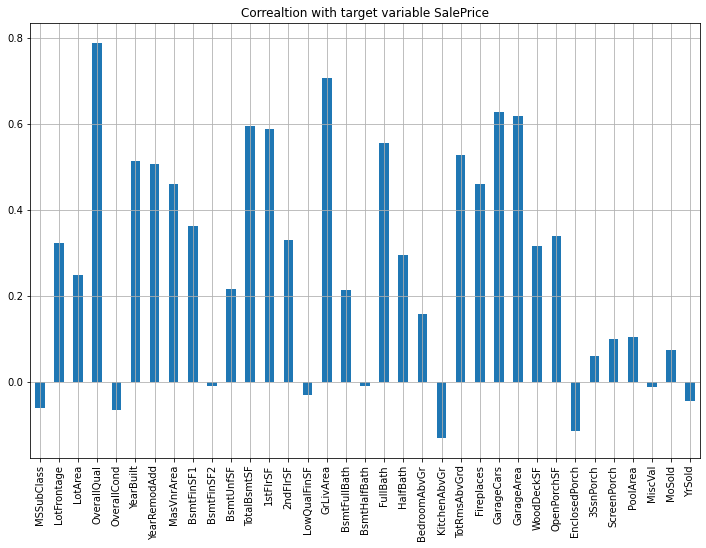

In [32]:
# Let's check the correlation with target variable 'SalePrice'

plt.figure(figsize=(12,8))
train.drop('SalePrice', axis=1).corrwith(train['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correaltion with target variable SalePrice");

Observation:
1. The column OverallQual is most positively correlated with SalePrice.

2.The column KitchenAbvGrd and EnclosedPorch is most negatively correlated with SalePrice.

# Data Visualization

Univatriate Analysis

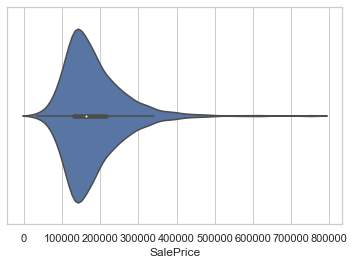

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64

In [33]:
# Let's Check the target variable

sns.set(style='whitegrid')
sns.violinplot(train['SalePrice'])
plt.show()

train['SalePrice'].value_counts()

Maximum number of SalePrice lies between 140000 and 230000.

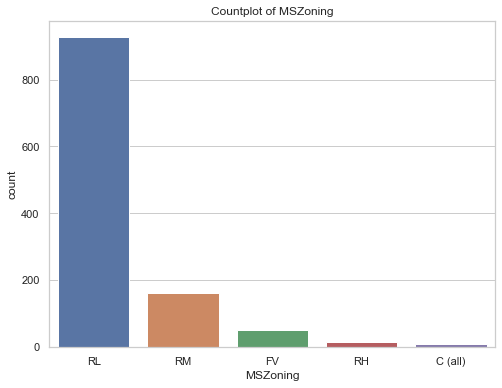

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [34]:
# Let's check the column MsZoning

plt.subplots(figsize=(8,6))
sns.countplot(x="MSZoning", data=train)
plt.title("Countplot of MSZoning")
plt.xlabel('MSZoning')
plt.ylabel("count")
plt.show()

train['MSZoning'].value_counts()

Maximum, 928 number of MSZoning are RL

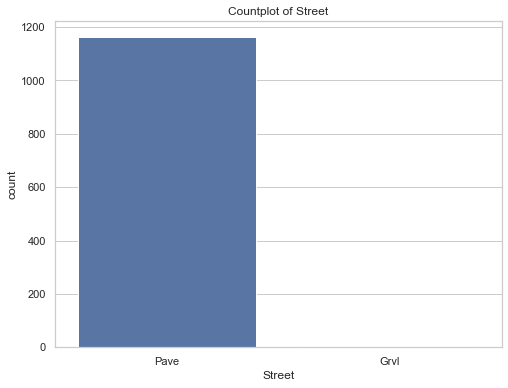

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [35]:
# Let's check the column Street

plt.subplots(figsize=(8,6))
sns.countplot(x="Street", data=train)
plt.title("Countplot of Street")
plt.xlabel('Street')
plt.ylabel("count")
plt.show()

train['Street'].value_counts()

Maximum, 1164 number of Street are Pave where as only 4 are Grvl.

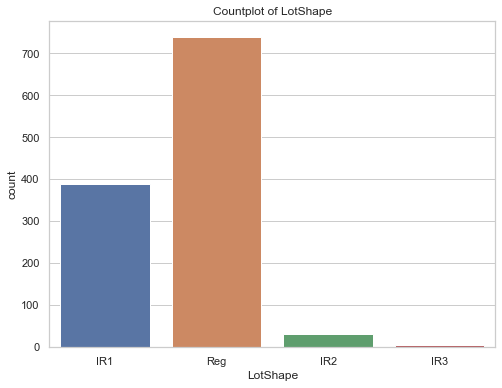

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [36]:
# Let's check the column LotShape

plt.subplots(figsize=(8,6))
sns.countplot(x="LotShape", data=train)
plt.title("Countplot of LotShape")
plt.xlabel('LotShape')
plt.ylabel("count")
plt.show()

train['LotShape'].value_counts()

Maximum, 740 number of LotShape are Reg.

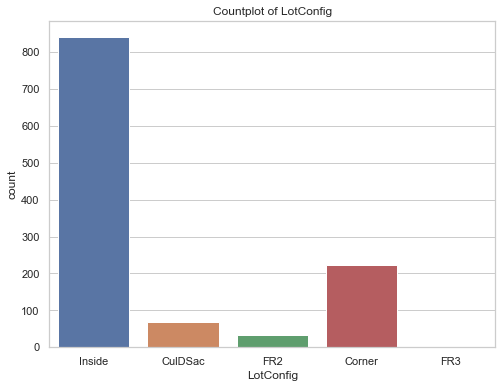

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [37]:
# Let's check the column LotConfig

plt.subplots(figsize=(8,6))
sns.countplot(x="LotConfig", data=train)
plt.title("Countplot of LotConfig")
plt.xlabel('LotConfig')
plt.ylabel("count")
plt.show()

train['LotConfig'].value_counts()

Maximum, 842 number of LotConfig are Inside.

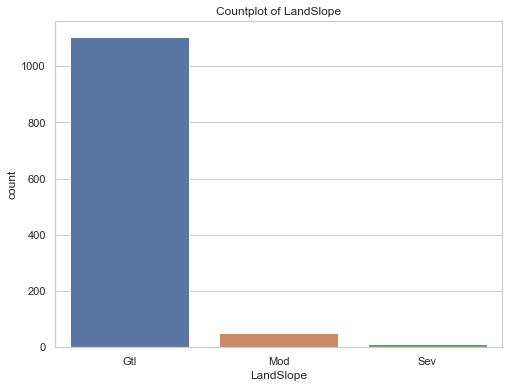

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [38]:
# Let's check the column LandSlope

plt.subplots(figsize=(8,6))
sns.countplot(x="LandSlope", data=train)
plt.title("Countplot of LandSlope")
plt.xlabel('LandSlope')
plt.ylabel("count")
plt.show()

train['LandSlope'].value_counts()

Maximum, 1105 number of LandSlope are Gtl

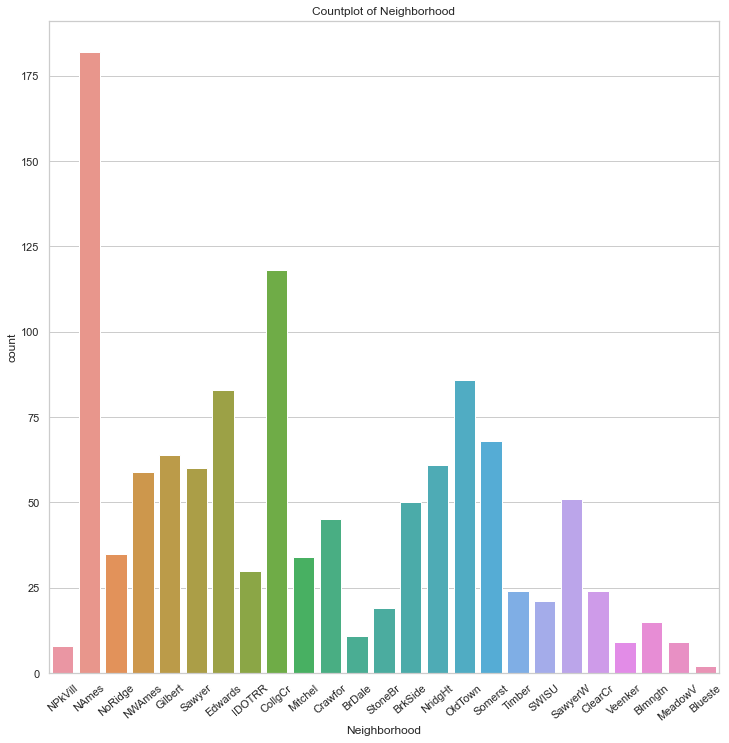

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Veenker      9
MeadowV      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [39]:
# Let's check the column Neighborhood

plt.subplots(figsize=(12,12))
sns.countplot(x="Neighborhood", data=train)
plt.title("Countplot of Neighborhood")
plt.xticks(rotation=40)
plt.xlabel('Neighborhood')
plt.ylabel("count")
plt.show()

train['Neighborhood'].value_counts()

Maximum, 182 number of Neighborhood are Names.

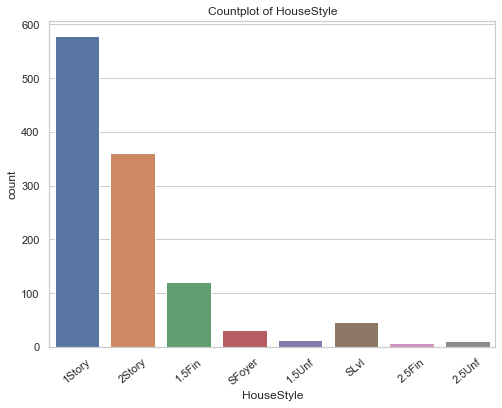

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [40]:
# Let's check the column HouseStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="HouseStyle", data=train)
plt.title("Countplot of HouseStyle")
plt.xticks(rotation=40)
plt.xlabel('HouseStyle')
plt.ylabel("count")
plt.show()

train['HouseStyle'].value_counts()

1Story has highest number of count followed by 2Story, 1.5Fin, SlvL etc

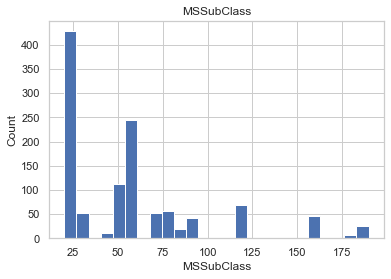

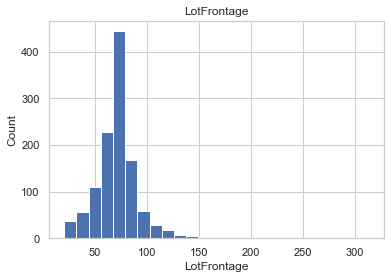

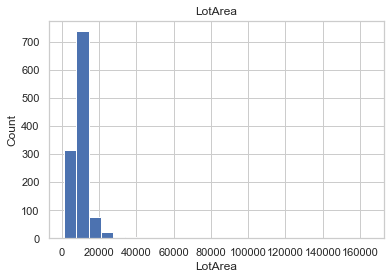

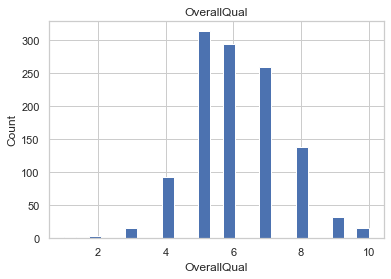

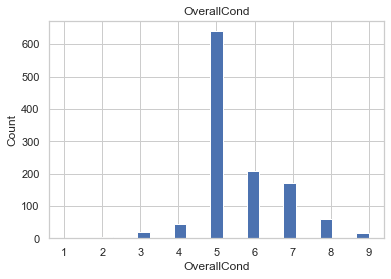

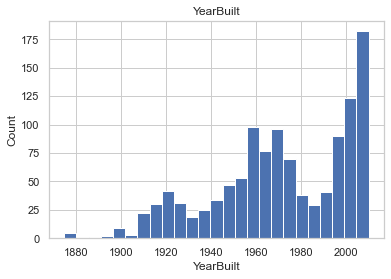

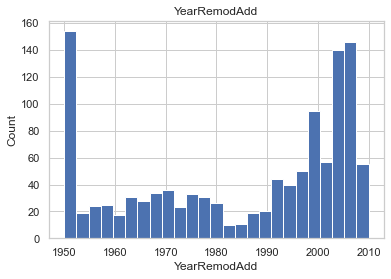

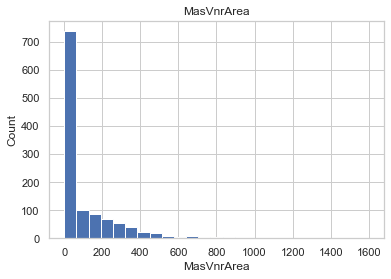

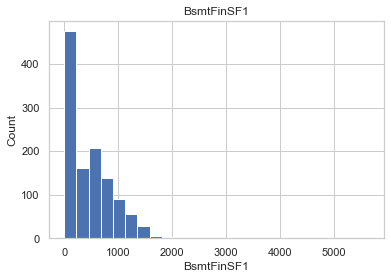

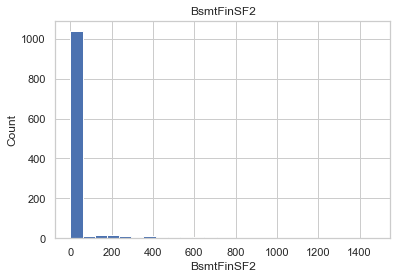

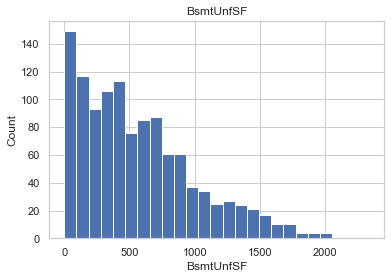

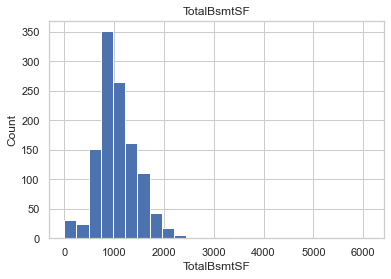

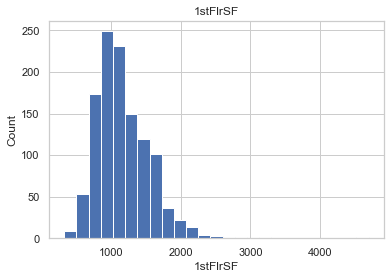

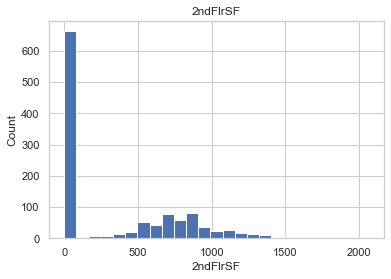

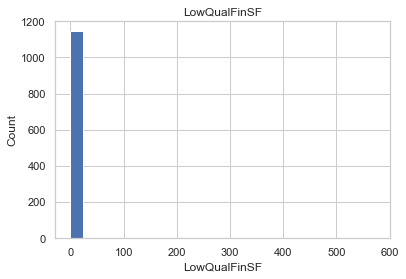

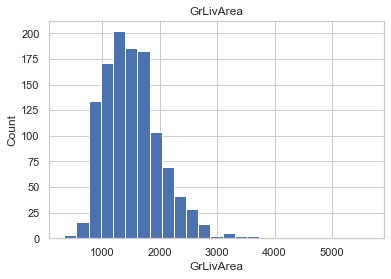

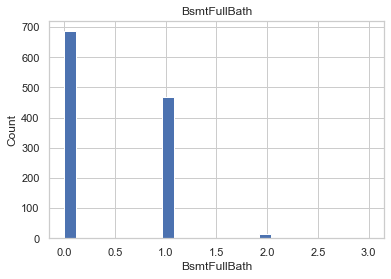

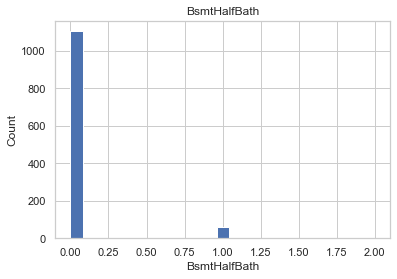

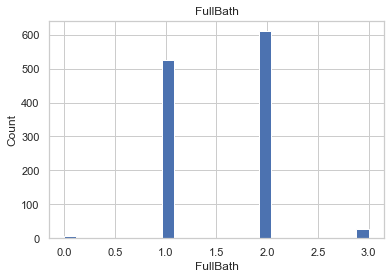

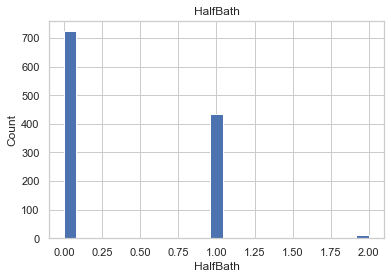

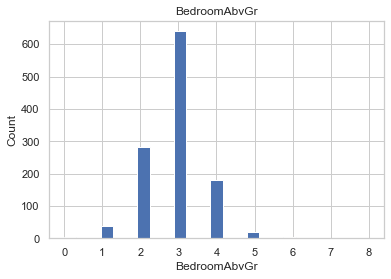

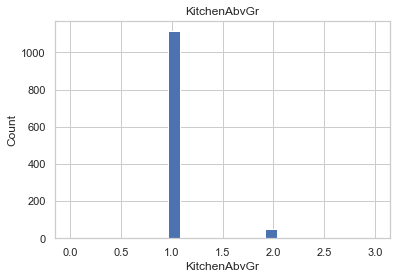

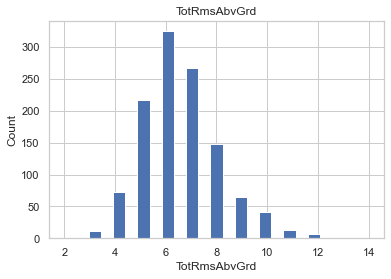

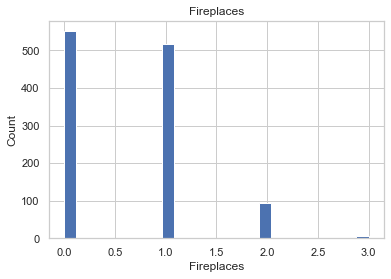

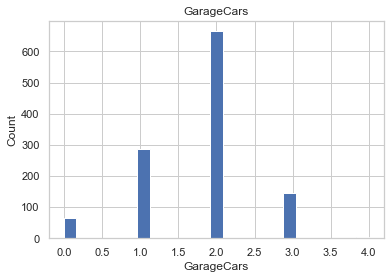

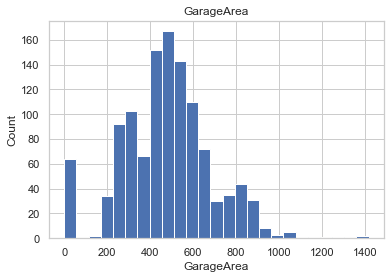

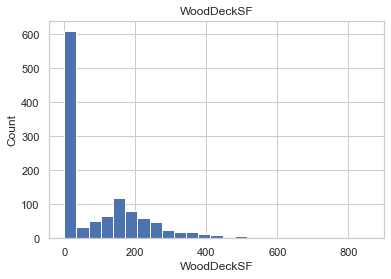

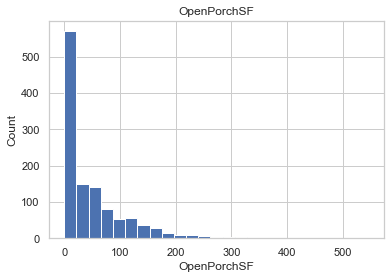

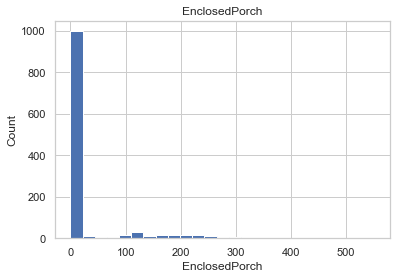

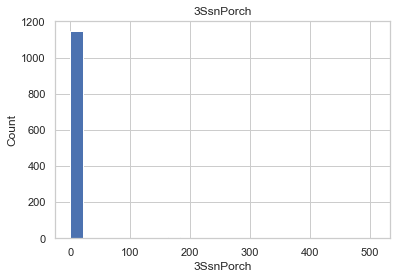

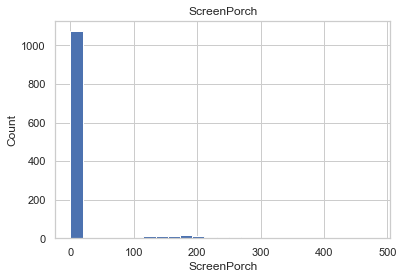

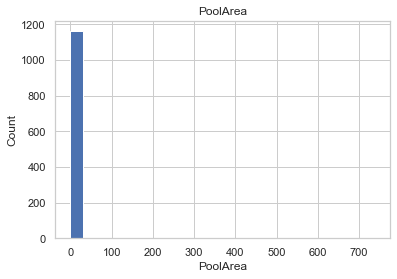

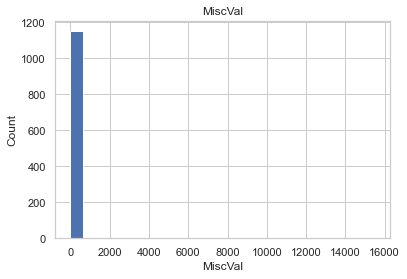

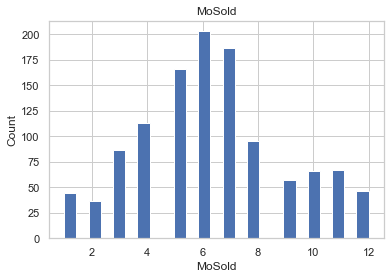

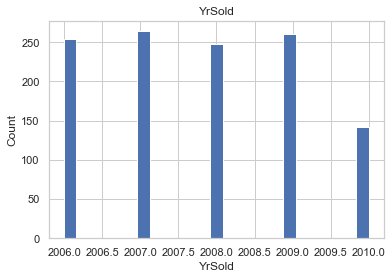

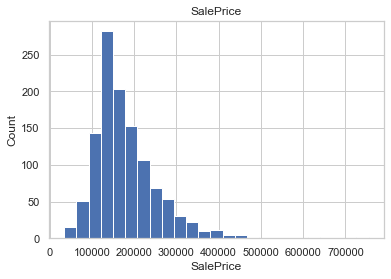

In [41]:
# Let's plot the histogram of every numerical column

for col in train.describe().columns:
    data=train.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

# Bivariate Analysis

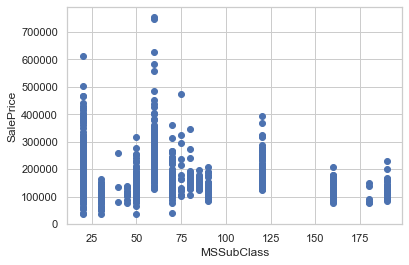

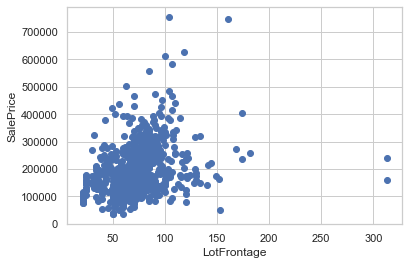

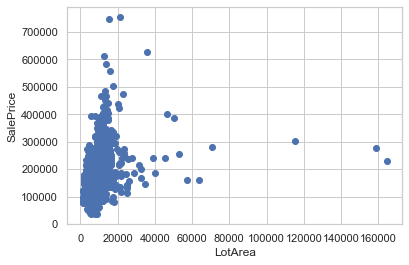

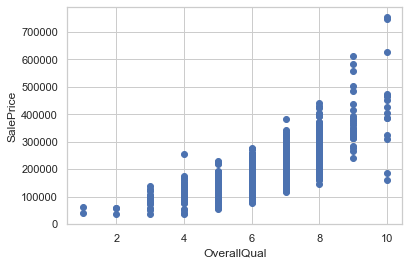

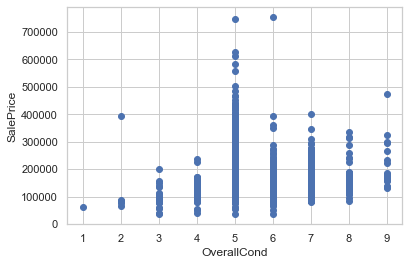

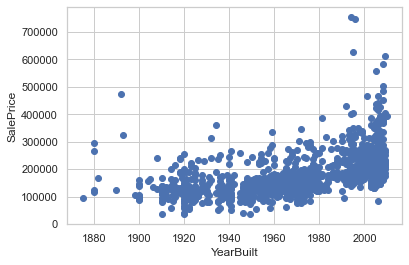

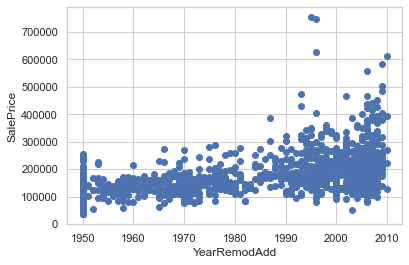

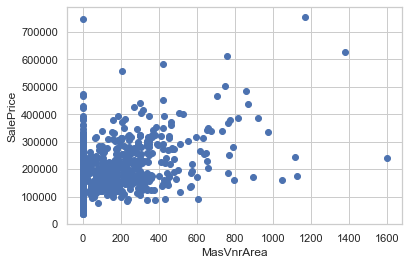

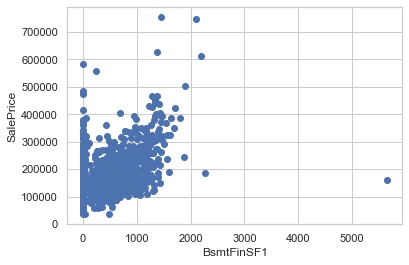

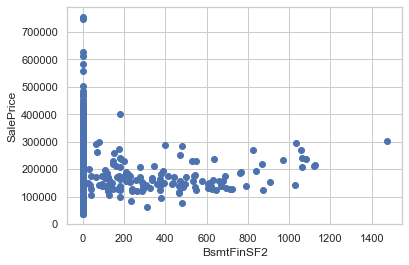

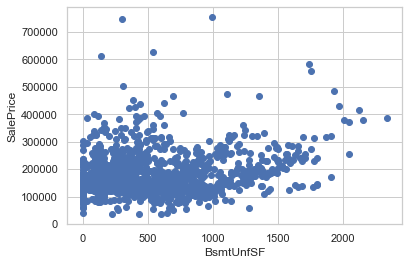

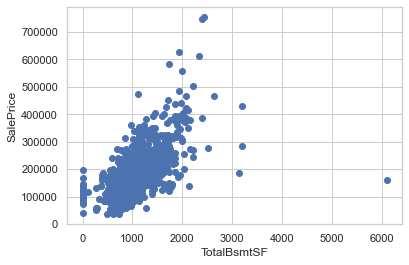

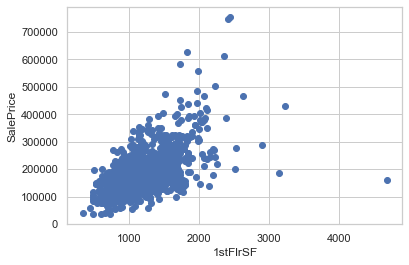

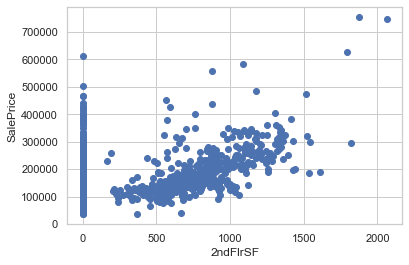

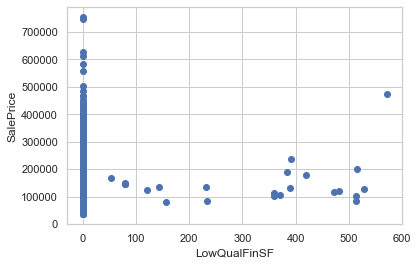

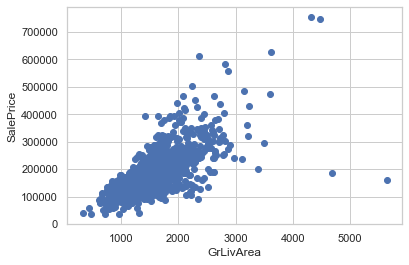

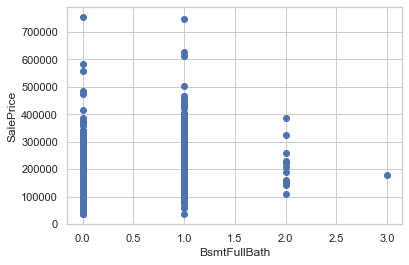

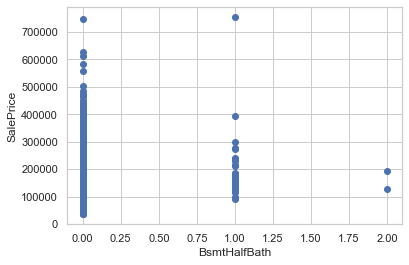

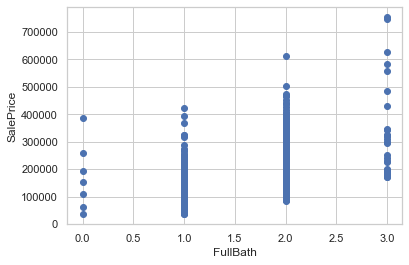

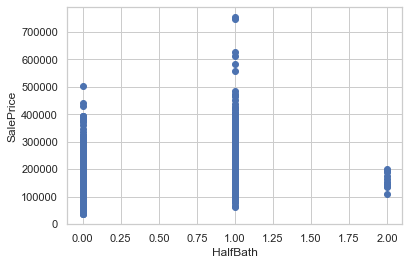

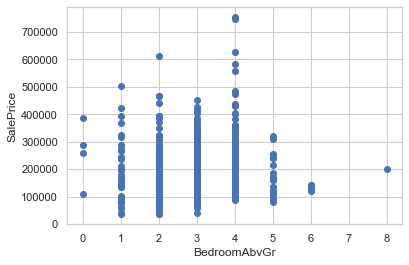

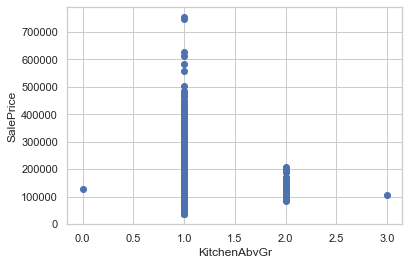

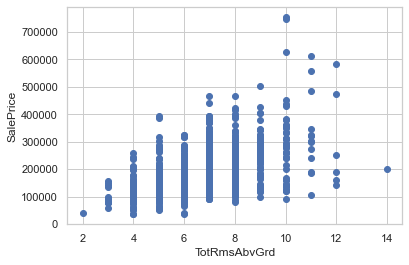

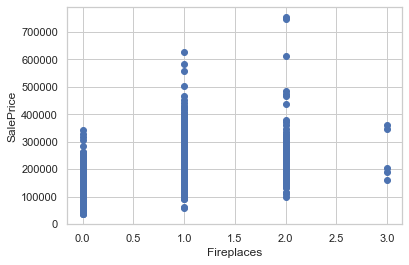

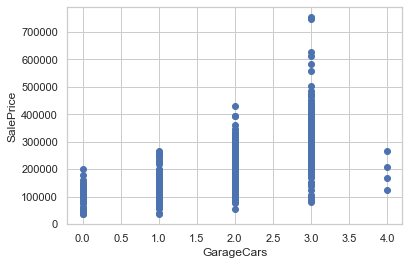

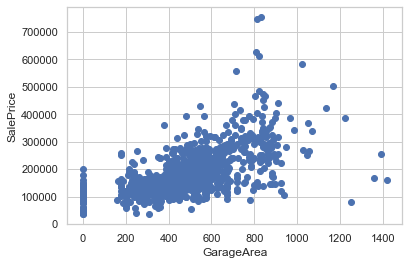

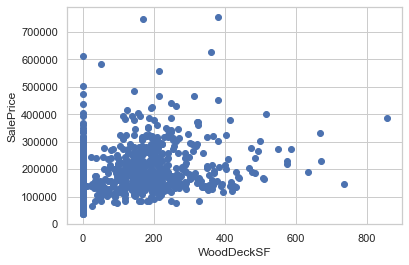

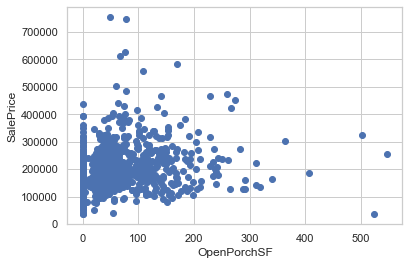

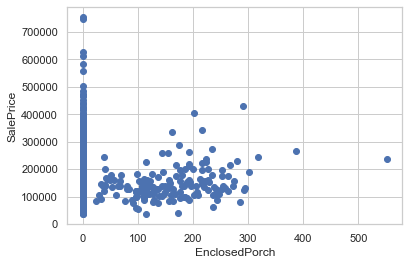

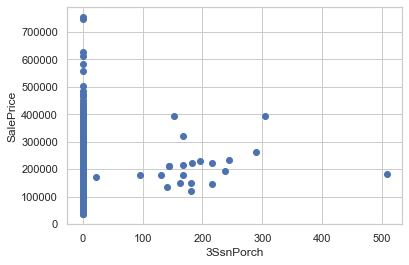

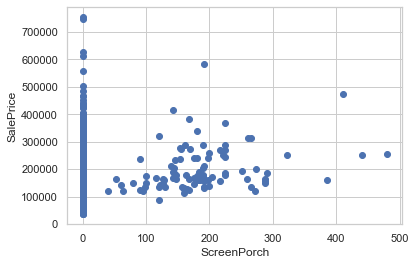

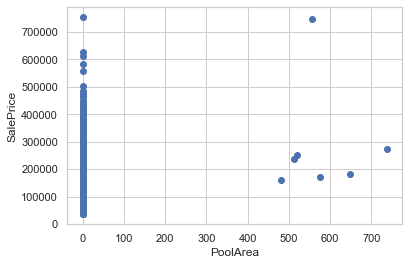

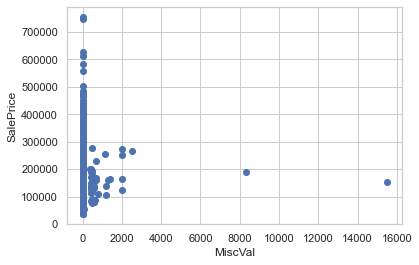

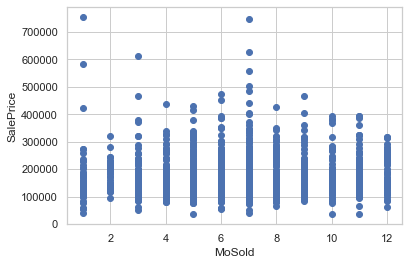

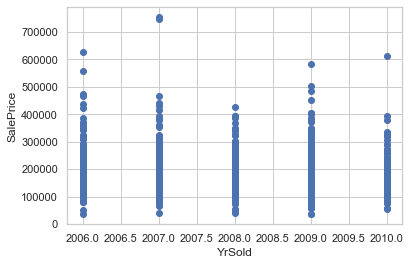

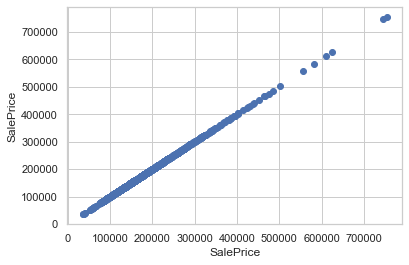

In [42]:
# Let's plot the Scatter plot between all feature variables and target variable

for col in train.describe().columns:
    data=train.copy()
    plt.scatter(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

<Figure size 576x432 with 0 Axes>

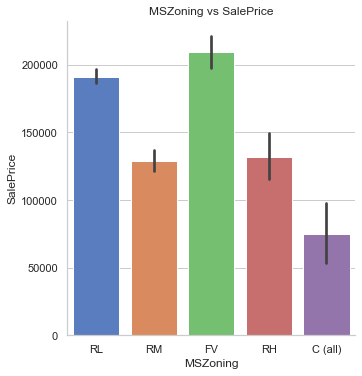

SalePrice  MSZoning
34900      C (all)     1
35311      C (all)     1
37900      RM          1
39300      RL          1
40000      C (all)     1
                      ..
582933     RL          1
611657     RL          1
625000     RL          1
745000     RL          1
755000     RL          1
Name: MSZoning, Length: 697, dtype: int64


In [43]:
# Let's plot the Factor plot of MSZoning vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='MSZoning',y='SalePrice',data=train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('MSZoning vs SalePrice')
plt.ylabel('SalePrice')
plt.show()
print(train.groupby('SalePrice')['MSZoning'].value_counts());

SalePrice is maximum with FV MSZOning.

<Figure size 576x432 with 0 Axes>

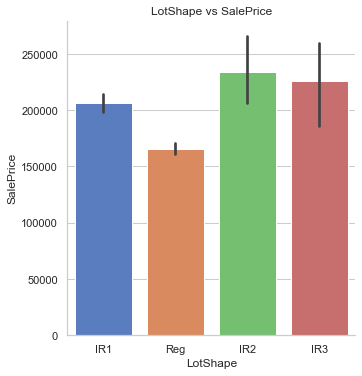

SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
39300      Reg         1
40000      Reg         1
                      ..
582933     Reg         1
611657     IR1         1
625000     IR1         1
745000     IR1         1
755000     IR1         1
Name: LotShape, Length: 733, dtype: int64


In [44]:
# Let's plot the Factor plot of LotShape vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotShape',y='SalePrice',data=train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotShape vs SalePrice')
plt.ylabel('SalePrice')
plt.show();
print(train.groupby('SalePrice')['LotShape'].value_counts());

SalePrice is maximum with IR2 LotShape.

<Figure size 1152x1152 with 0 Axes>

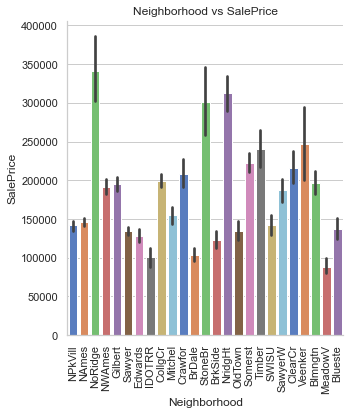

SalePrice  Neighborhood
34900      IDOTRR          1
35311      IDOTRR          1
37900      OldTown         1
39300      BrkSide         1
40000      IDOTRR          1
                          ..
582933     NridgHt         1
611657     NridgHt         1
625000     NoRidge         1
745000     NoRidge         1
755000     NoRidge         1
Name: Neighborhood, Length: 1013, dtype: int64


In [45]:
# Let's plo the Factor plot of Neighborhood vs SalePrice

plt.figure(figsize=(16,16))
sns.factorplot(x='Neighborhood',y='SalePrice',data=train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation='vertical')
plt.ylabel('SalePrice')
plt.show()

print(train.groupby('SalePrice')['Neighborhood'].value_counts())

<Figure size 576x432 with 0 Axes>

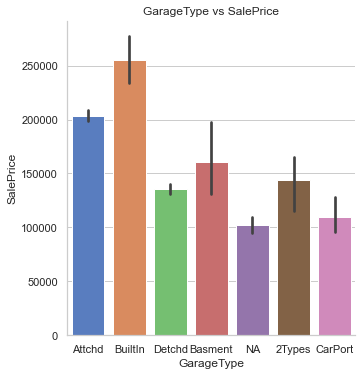

SalePrice  GarageType
34900      NA            1
35311      Detchd        1
37900      NA            1
39300      NA            1
40000      Detchd        1
                        ..
582933     BuiltIn       1
611657     Attchd        1
625000     Attchd        1
745000     Attchd        1
755000     Attchd        1
Name: GarageType, Length: 762, dtype: int64


In [46]:
# Let's plot the Factor plot of GarageType vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='GarageType',y='SalePrice',data=train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('GarageType vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(train.groupby('SalePrice')['GarageType'].value_counts())

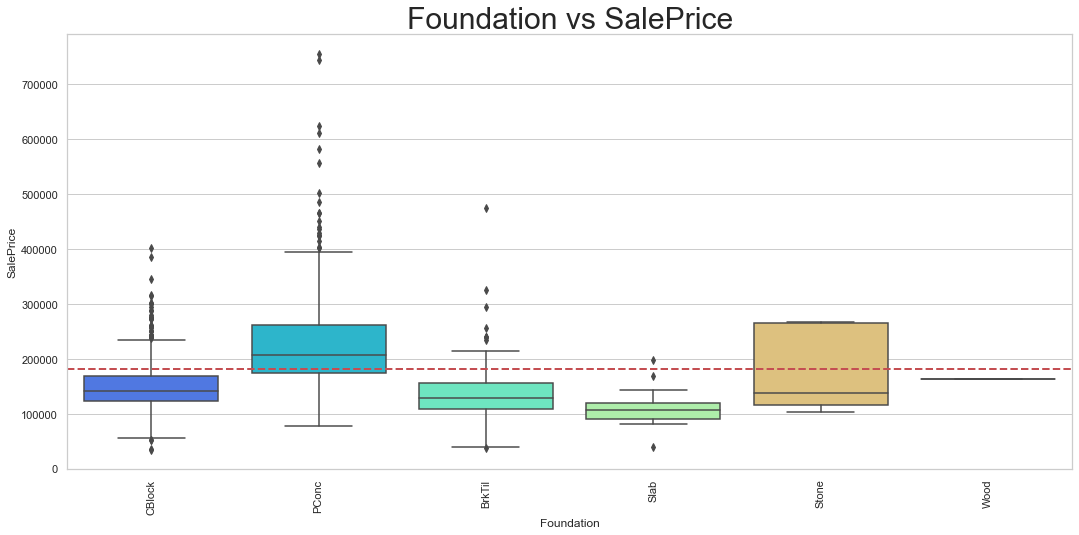

In [47]:
# Let's plot the Foundation vs SalePrice plot

plt.figure(figsize=(18,8))
mean_price=np.mean(train['SalePrice'])
sns.boxplot(y='SalePrice',x='Foundation',data=train,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Foundation vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

SalePrice is maximum with PConc

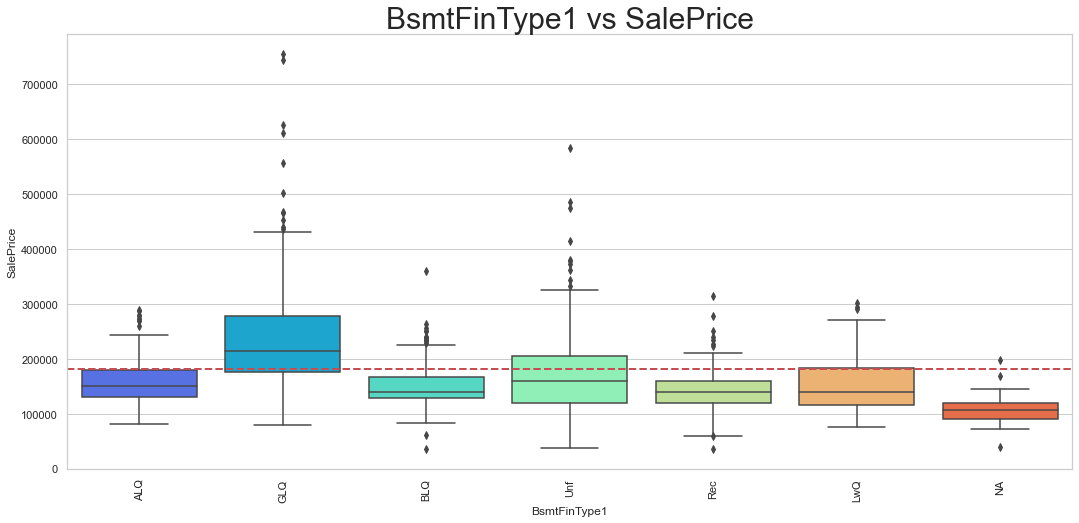

In [48]:
# Let's plot the BsmtFinType1 vs SalePrice plot

plt.figure(figsize=(18,8))
mean_price=np.mean(train['SalePrice'])
sns.boxplot(y='SalePrice',x='BsmtFinType1',data=train,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("BsmtFinType1 vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()


SalePrice is maximum with GLQ BsmtFinType1.

# Multivariate Analysis

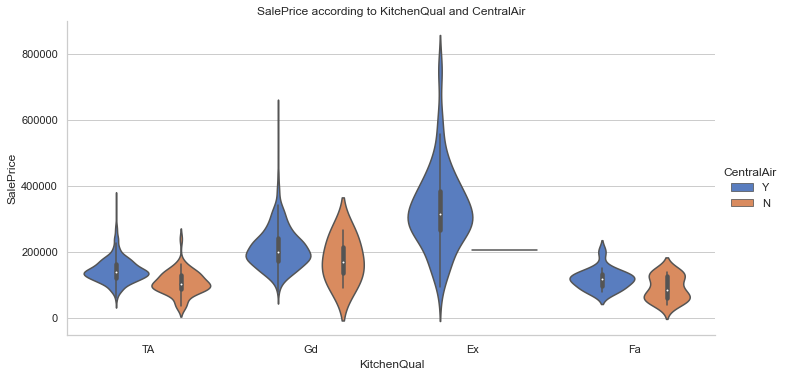

In [49]:
# Let's plot the GarageType and GarageCond with respect to SalePrice plot

sns.factorplot(x='KitchenQual',y='SalePrice',hue='CentralAir',data=train,kind='violin',size=5,palette='muted',aspect=2)
plt.title('SalePrice according to KitchenQual and CentralAir')
plt.xticks()
plt.ylabel('SalePrice')
plt.show()

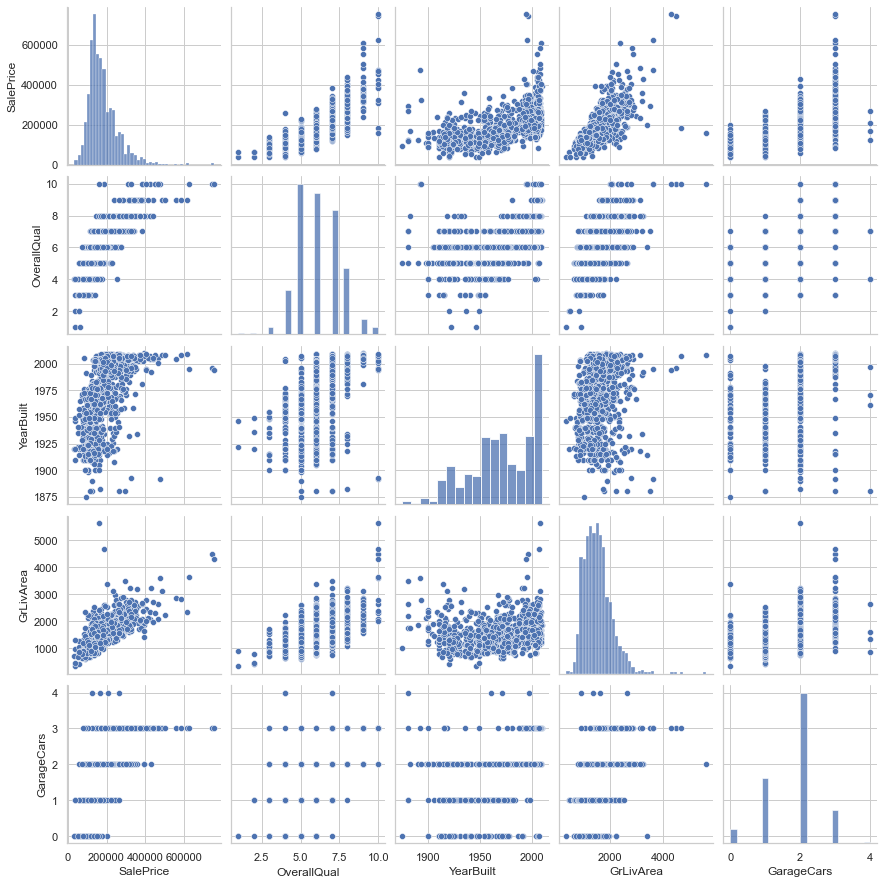

In [50]:
# Let's plot the pairplot

sns.pairplot(train, vars=['SalePrice','OverallQual','YearBuilt','GrLivArea','GarageCars']);

SalePrice is highly positively correlated with GrLivArea and OverallQual.

# PRE - PROCESSING

In [51]:
#Encoding Catgorical Columns train dataset
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

train = pd.get_dummies(train, columns = categorical_cols, drop_first=True)
train

MSSubClass  LotFrontage  LotArea Alley Utilities  OverallQual  \
0            120         70.0     4928   NaN    AllPub            6   
1             20         95.0    15865   NaN    AllPub            8   
2             60         92.0     9920   NaN    AllPub            7   
3             20        105.0    11751   NaN    AllPub            6   
4             20         70.0    16635   NaN    AllPub            6   
...          ...          ...      ...   ...       ...          ...   
1163          20         70.0     9819   NaN    AllPub            5   
1164          20         67.0     8777   NaN    AllPub            4   
1165         160         24.0     2280   NaN    AllPub            6   
1166          70         50.0     8500  Pave    AllPub            4   
1167          60         70.0     7861   NaN    AllPub            6   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0               5       1976          1976         0.0         120   
1               6       1970          1970         0.0         351   
2               5       1996          1997         0.0         862   
3               6       1977          1977       480.0         705   
4               7       1977          2000       126.0        1246   
...           ...        ...           ...         ...         ...   
1163            5       1967          1967        31.0         450   
1164            5       1949          2003         0.0           0   
1165            6       1976          1976         0.0         566   
1166            4       1920          1950         0.0           0   
1167            5       2002          2003         0.0         457   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0              0        958         1078       958         0             0   
1            823       1043         2217      2217         0             0   
2              0        255         1117      1127       886             0   
3              0       1139         1844      1844         0             0   
4              0        356         1602      1602         0             0   
...          ...        ...          ...       ...       ...           ...   
1163           0        432          882       900         0             0   
1164           0          0            0      1126         0             0   
1165           0        289          855       855       601             0   
1166           0        649          649       649       668             0   
1167           0        326          783       807       702             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0           958             0             0         2         0             2   
1          2217             1             0         2         0             4   
2          2013             1             0         2         1             3   
3          1844             0             0         2         0             3   
4          1602             0             1         2         0             3   
...         ...           ...           ...       ...       ...           ...   
1163        900             0             0         1         0             3   
1164       1126             0             0         2         0             2   
1165       1456             0             0         2         1             3   
1166       1317             0             0         1         0             3   
1167       1509             1             0         2         1             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces GarageYrBlt  GarageCars  \
0                1             5           1        1977           2   
1                1             8           1        1970           2   
2                1             8           1        1997           2   
3                1             7           1        1977           2   
4                1             8          

In [52]:
# Let's drop unnecessary columns

train.drop(['Utilities',"PoolQC", "MiscFeature", "Alley", "Fence",],axis=1,inplace=True)
train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120         70.0     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20         70.0    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20         70.0     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60         70.0     7861            6            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             1976         0.0         120           0        958   
1             1970         0.0         351         823       1043   
2             1997         0.0         862           0        255   
3             1977       480.0         705           0       1139   
4             2000       126.0        1246           0        356   
...            ...         ...         ...         ...        ...   
1163          1967        31.0         450           0        432   
1164          2003         0.0           0           0          0   
1165          1976         0.0         566           0        289   
1166          1950         0.0           0           0        649   
1167          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces GarageYrBlt  GarageCars  GarageArea  \
0                5           1        1977           2         440   
1                8           1        1970           2         621   
2                8           1        1997           2         455   
3                7           1        1977           2         546   
4                8           1        1977           2         529   
...   

In [53]:
#Encoding categorical columns test dataset
categorical_colss = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

test = pd.get_dummies(test, columns = categorical_colss, drop_first=True)

In [54]:
# Let's drop unnecessary columns
test.drop(['Utilities',"PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

In [55]:
test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            20         86.0    14157            9            5       2005   
1           120         65.0     5814            8            5       1984   
2            20         65.0    11838            8            5       2001   
3            70         75.0    12000            7            7       1941   
4            60         86.0    14598            6            5       2007   
..          ...          ...      ...          ...          ...        ...   
287          20         78.0    10206            8            5       2007   
288          20         57.0     9245            5            5       1994   
289          20         65.0    11241            6            7       1970   
290          50         50.0     5000            6            7       1947   
291         160         21.0     1953            6            5       1973   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            2006       200.0        1249           0        673         1922   
1            1984         0.0        1036           0        184         1220   
2            2001         0.0           0           0       1753         1753   
3            1950         0.0         275           0        429          704   
4            2007        74.0           0           0        894          894   
..            ...         ...         ...         ...        ...          ...   
287          2007       468.0          33           0       1530         1563   
288          1995         0.0         686           0        304          990   
289          1970       180.0         578           0        426         1004   
290          1950         0.0         399           0        605         1004   
291          1973       408.0         309           0        174          483   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        1922         0             0       1922             1             0   
1        1360         0             0       1360             1             0   
2        1788         0             0       1788             0             0   
3         860       704             0       1564             0             0   
4         894      1039             0       1933             0             0   
..        ...       ...           ...        ...           ...           ...   
287      1563         0             0       1563             0             0   
288       990         0             0        990             0             1   
289      1004         0             0       1004             1             0   
290      1004       660             0       1664             0             0   
291       483       504             0        987             0             0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           2         0             3             1             8           1   
1           1         0             1             1             4           1   
2           2         0             3             1             7           1   
3           1         1             3             1             7           1   
4           2         1             4             1             9           1   
..        ...       ...           ...           ...           ...         ...   
287         2         0             3             1             6           1   
288         1         0             3             1             5           0   
289         1         0             2             1             5           1   
290         2         0             3             1             7           2   
291         1         1             2             1             5           0   

    GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          2005           3         676         178           51   
1          1984          

# Handling outliers and skewness

In [56]:
# Let's make a copy of our dataset

train_cap = train.copy()

In [57]:
def percentile_capping(train, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=train[col], limits=(from_low_end, from_high_end), inplace=True)

In [58]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [59]:
percentile_capping(train, features, 0.01, 0.10)
# Let's check the shape

train_cap.shape

(1168, 244)

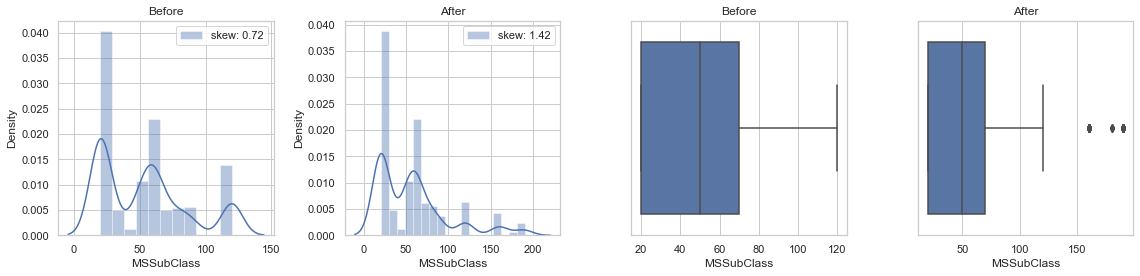

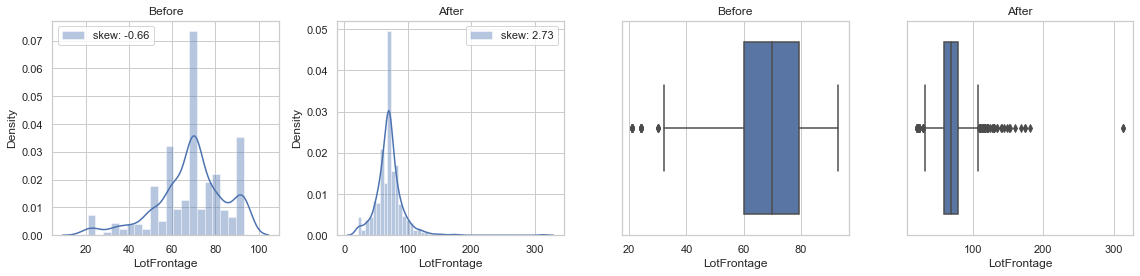

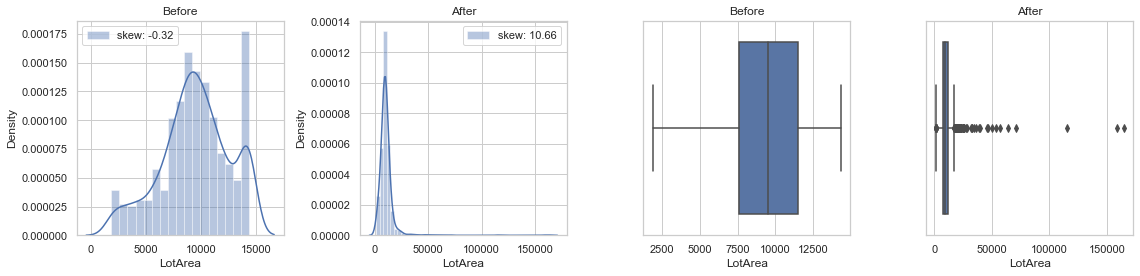

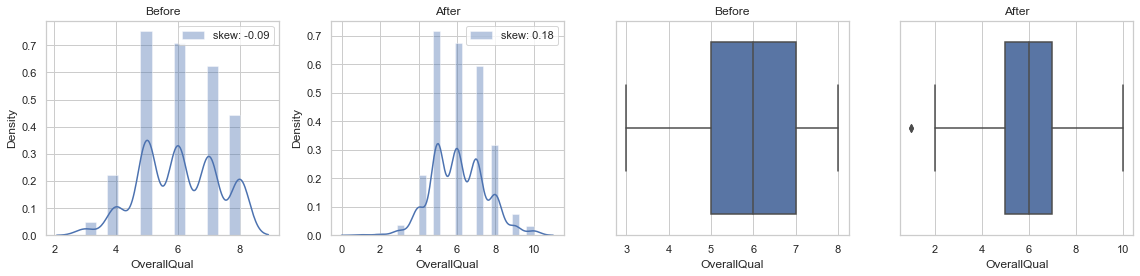

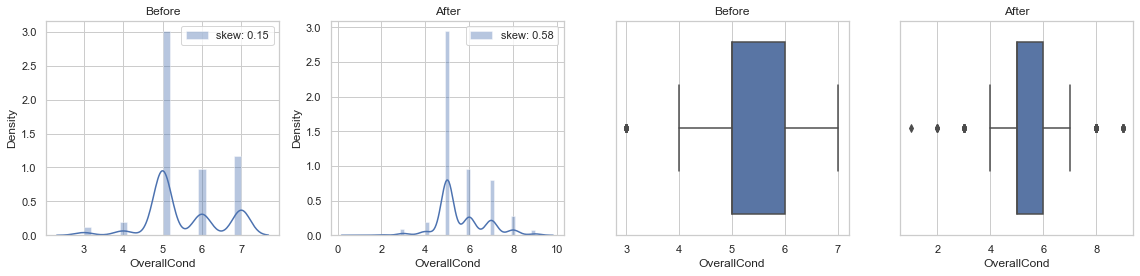

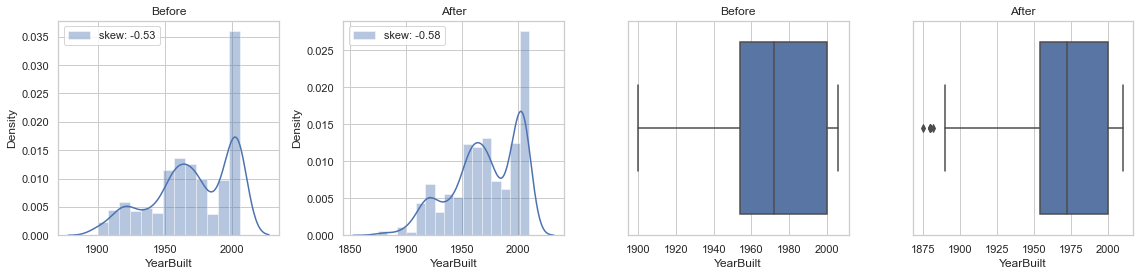

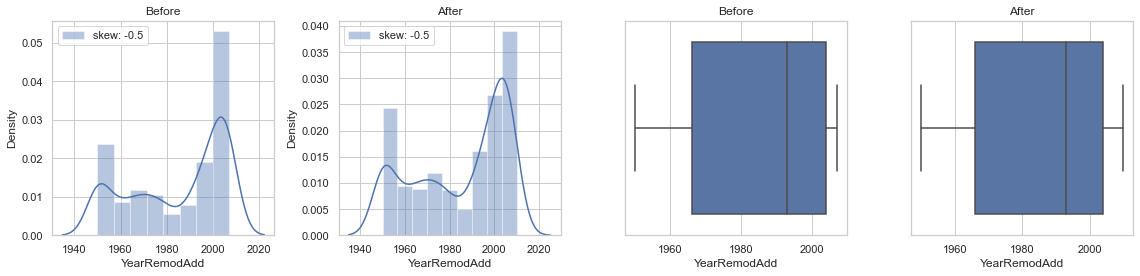

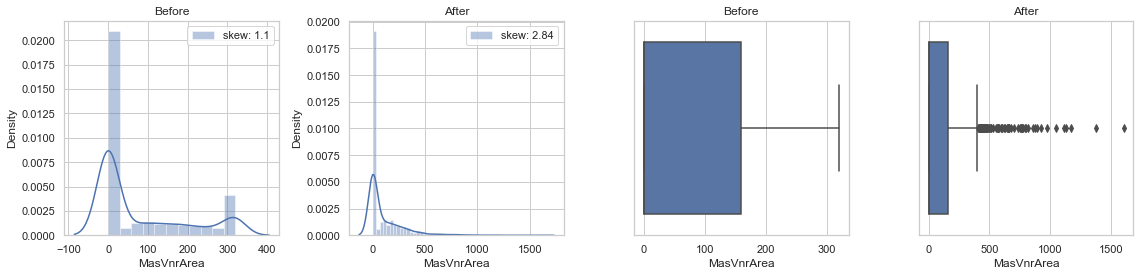

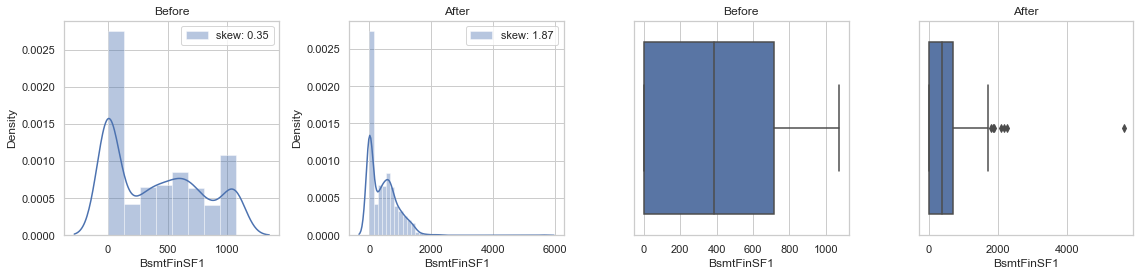

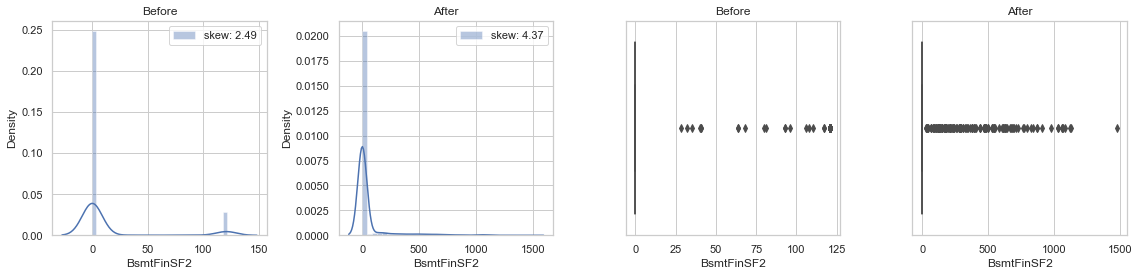

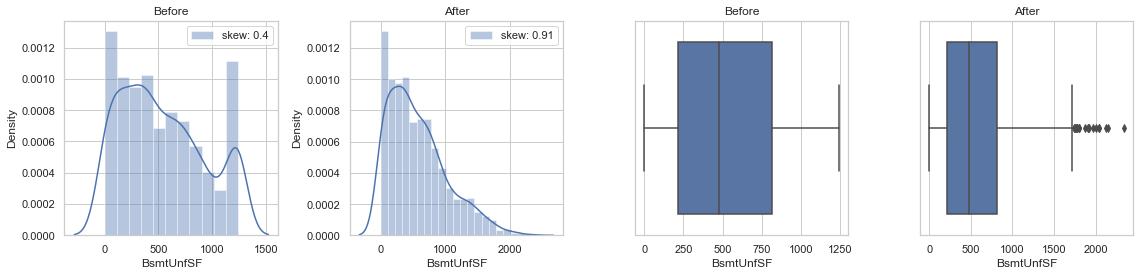

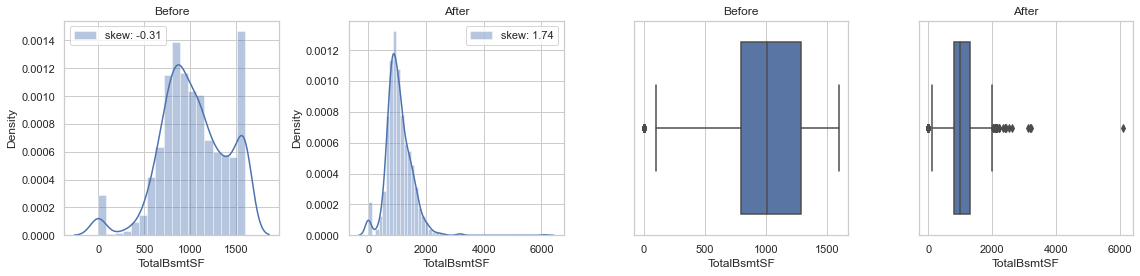

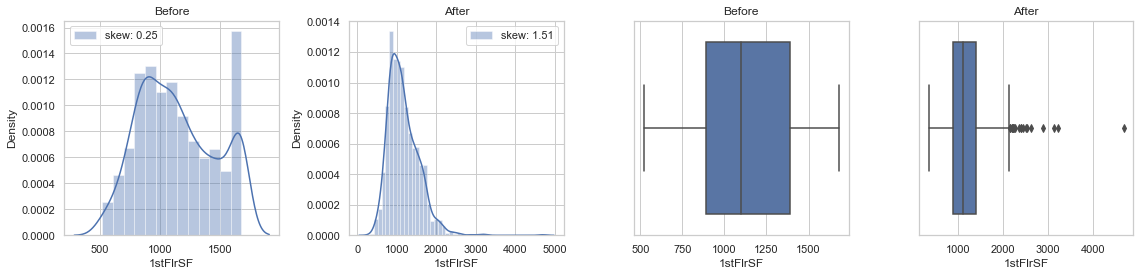

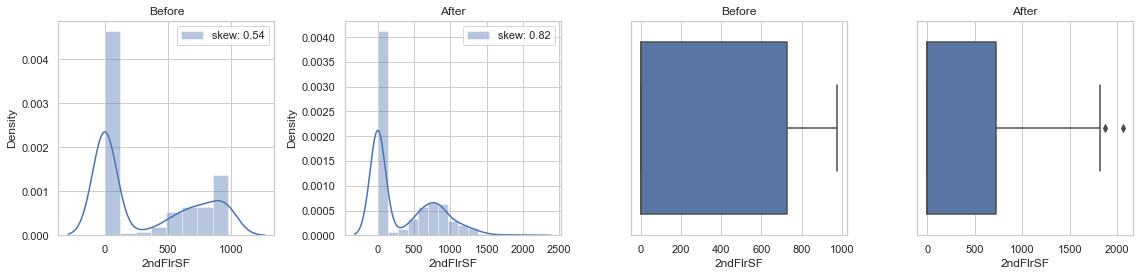

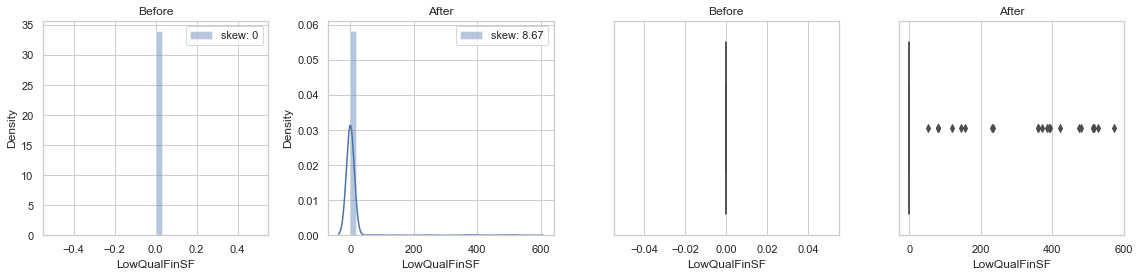

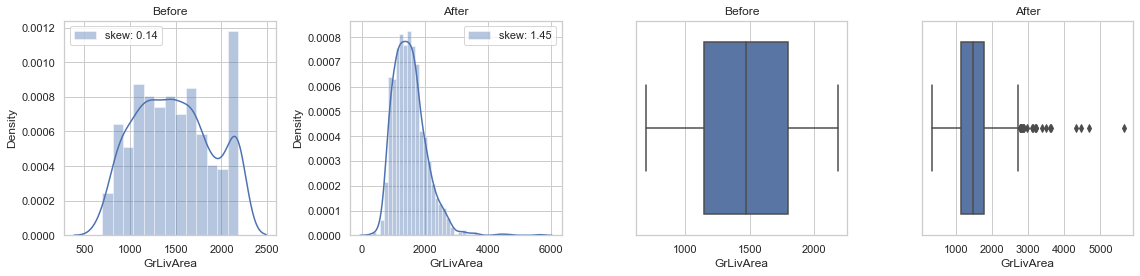

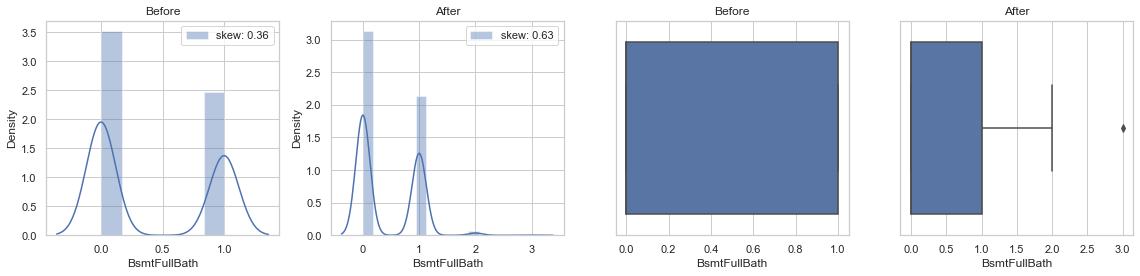

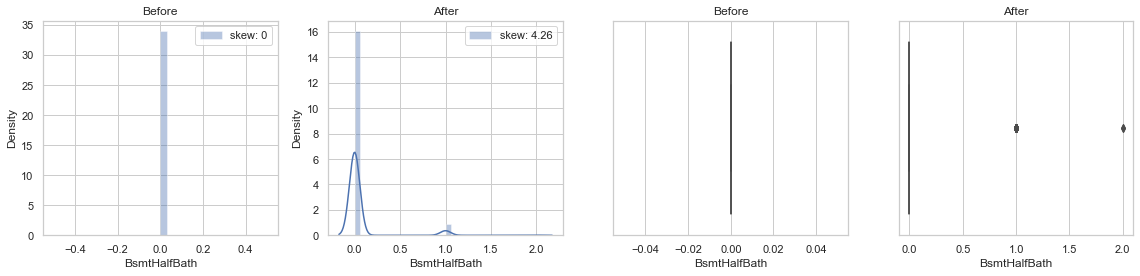

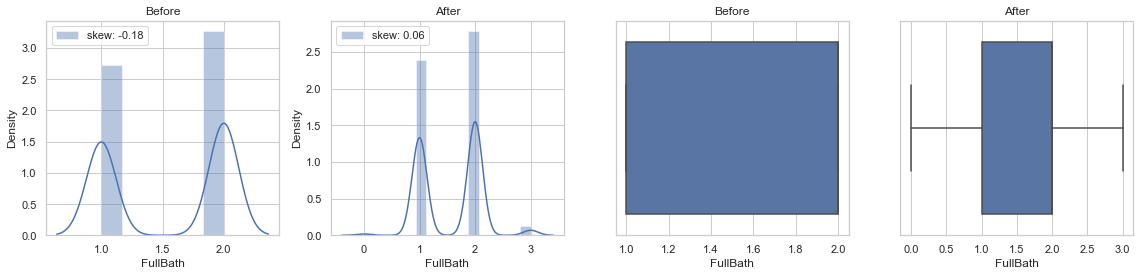

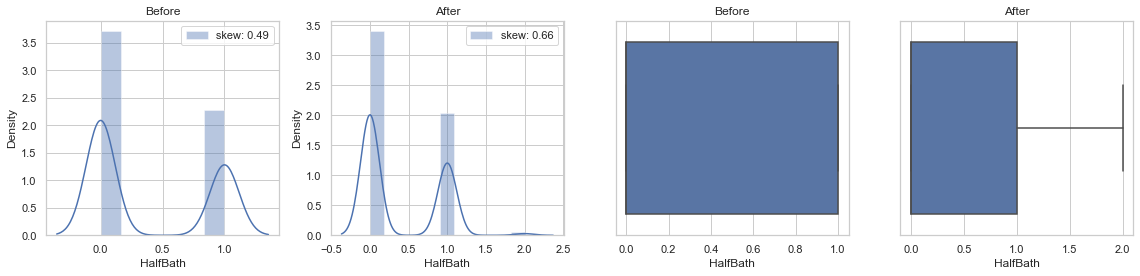

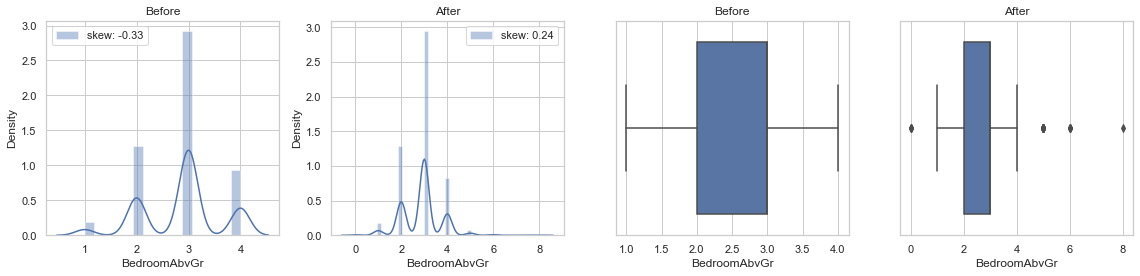

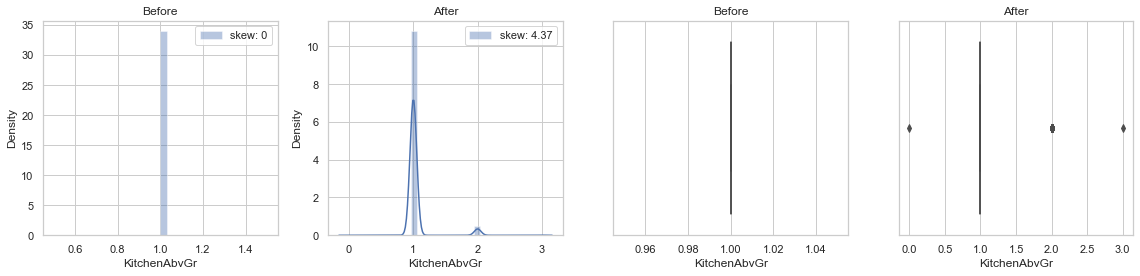

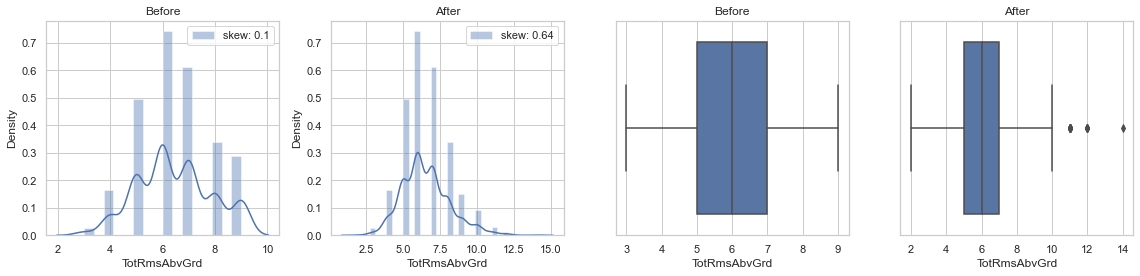

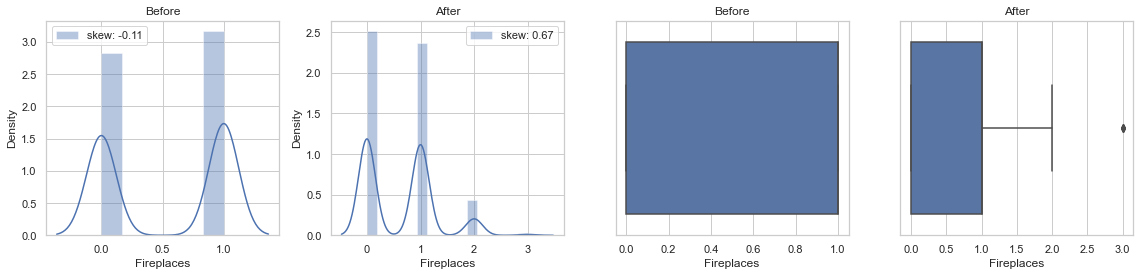

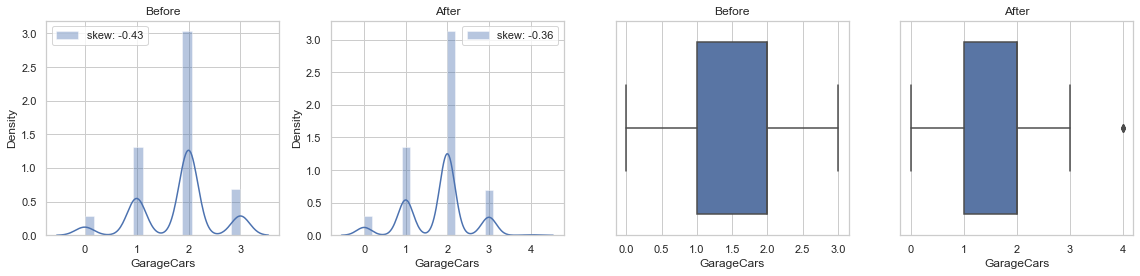

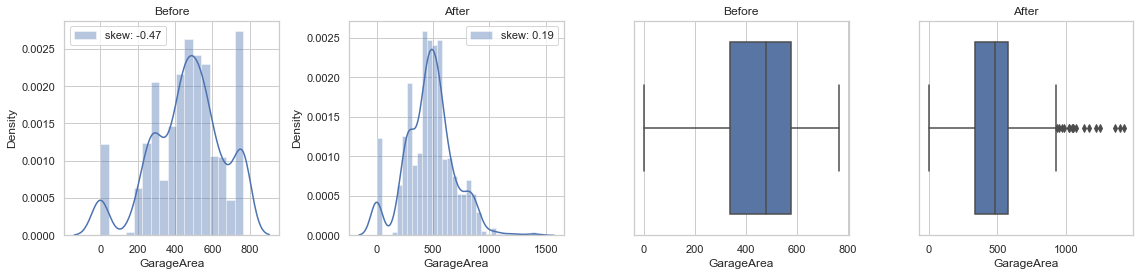

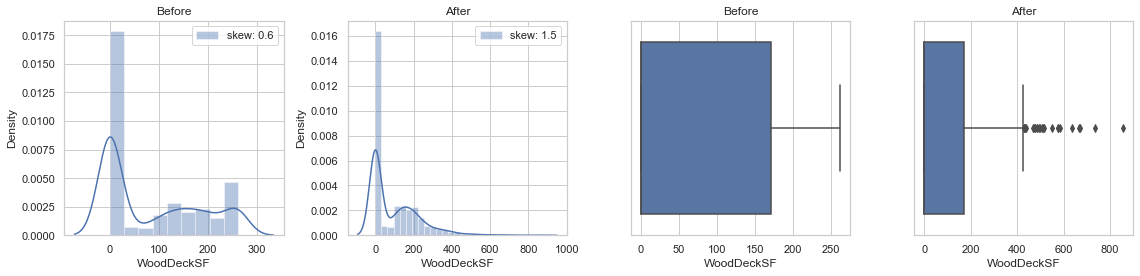

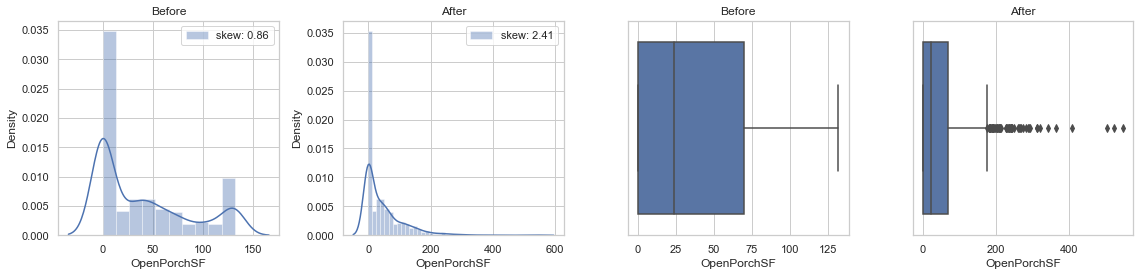

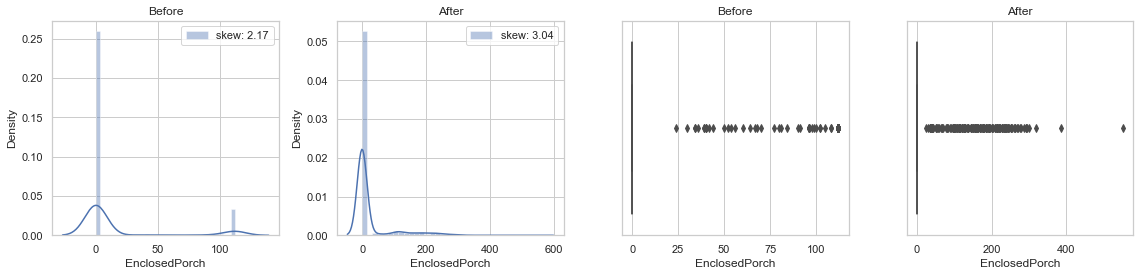

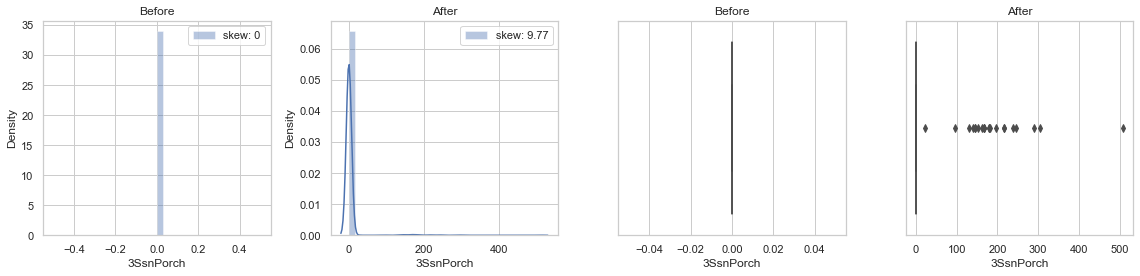

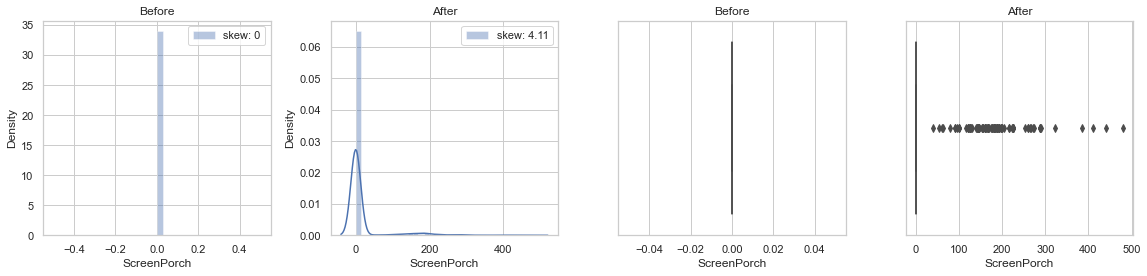

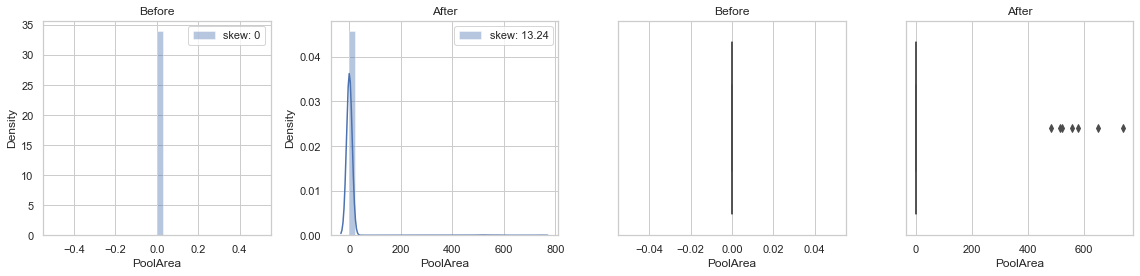

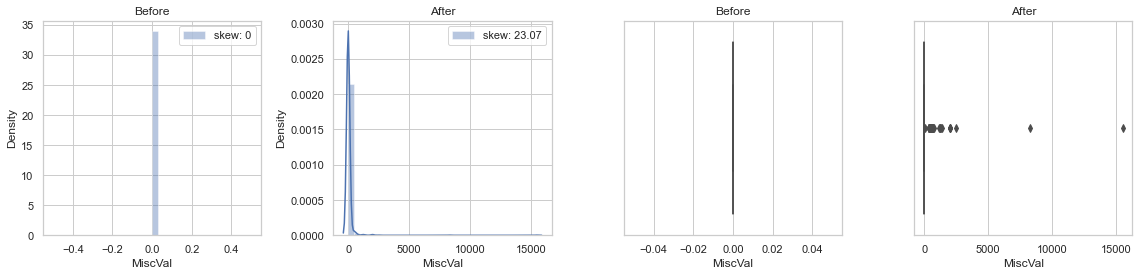

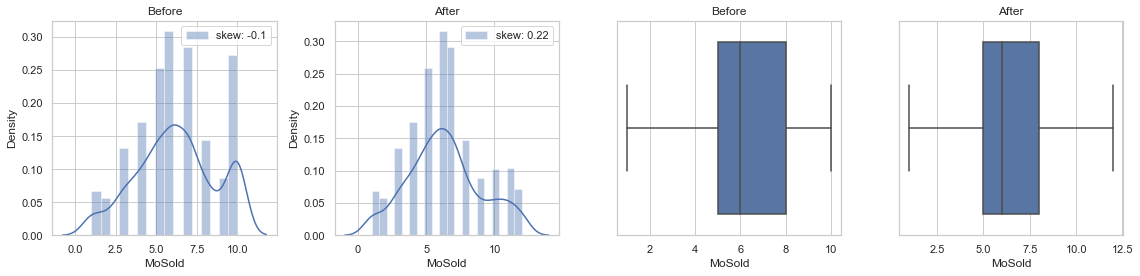

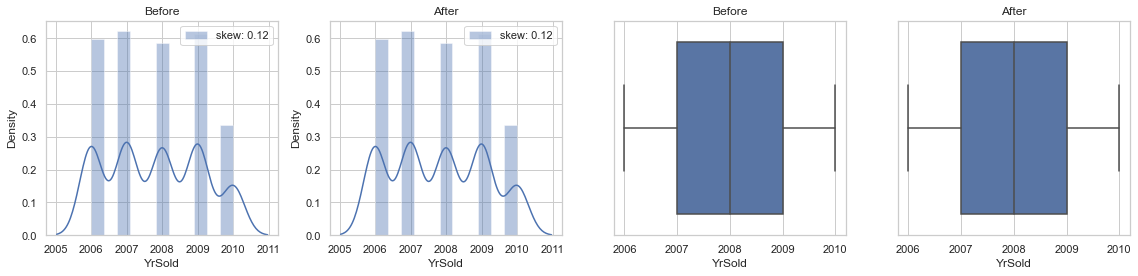

In [60]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(train[col], label="skew: " + str(np.round(train[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(train_cap[col], label="skew: " + str(np.round(train_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(train[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(train_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show();

In [61]:
test_cap=test.copy()

In [62]:
def percentile_capping(test, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=test[col], limits=(from_low_end, from_high_end), inplace=True)

In [63]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [64]:
percentile_capping(test_cap, features, 0.01, 0.10)
test_cap.shape

(292, 213)

# MODEL TRAINING

In [65]:
train_x=train_cap.drop(columns=['SalePrice'],axis=1)
y=train_cap['SalePrice']

# Standard Scaler

In [66]:
#Scaling input variables train dataset

sc=StandardScaler()
x=sc.fit_transform(train_x)
x=pd.DataFrame(x,columns=train_x.columns)

In [67]:
# Let's Scale the input variables test dataset

sc=StandardScaler()
x1=sc.fit_transform(test)
x1=pd.DataFrame(x1,columns=test.columns)

# PCA

In [68]:
# Let's explore the PCA train dataset

covar_matrix = PCA(n_components = len(x.columns))
covar_matrix.fit(x)

PCA(n_components=243)

In [69]:
# Let's check the PCA test dataset

covar_matrix = PCA(n_components = len(x1.columns))
covar_matrix.fit(x1)

PCA(n_components=213)

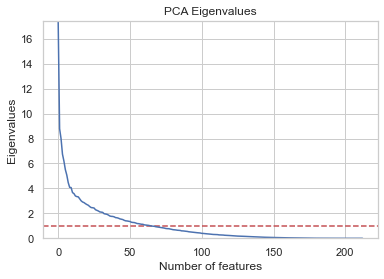

In [70]:
# Let's plot the PCA componenets

plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

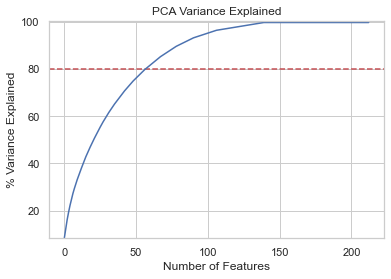

In [71]:
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [72]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x)
x=xpca

In [73]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x1)
x1=xpca

In [74]:
#train dataset
pd.DataFrame(data=x)

0         1          2         3         4         5         6   \
0     0.024203 -1.896772   0.132968  0.813620 -2.206522 -1.805259  1.034431   
1    -2.247532 -4.218601   2.433878  2.469312  5.427516  2.218112  4.358953   
2    -3.177174 -0.067181   0.034261 -0.530041  1.283979 -2.884311  1.487138   
3    -2.108235 -3.530354   1.215904  2.012312  1.144972  0.328639 -3.079236   
4    -3.131145 -1.375702   0.344745  1.784054  0.115241 -0.336750 -0.857211   
...        ...       ...        ...       ...       ...       ...       ...   
1163  3.795603 -2.918740  -1.471781 -0.272961 -2.503449  0.282213 -1.205917   
1164  4.015034  2.373413  10.994128 -4.930230 -3.242994  0.557608  0.474780   
1165  0.639928 -1.219520  -0.937125 -1.444673 -1.286561 -5.675778  0.851045   
1166  6.935124  2.136304  -2.251997 -2.370464  2.506943  1.337974 -0.223314   
1167 -3.748665  1.997147  -0.459540 -0.735757 -0.690352 -2.326145  1.362172   

            7         8         9         10        11        12        13  \
0     1.147879  0.745726  1.898982  2.584742 -1.795770  5.009447  3.036084   
1    -0.564862 -2.463044  0.688412  3.230519  5.214258 -1.647130  0.052249   
2     0.122719  0.733646 -1.442321 -1.461863 -0.102781 -1.062402  1.420415   
3    -0.172406  1.557100  0.780164  1.022909 -0.783959  2.496592  2.447499   
4     1.607950 -0.127917 -1.221305  1.763186  0.999673  0.281121 -0.927321   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.262078  0.679365  0.520008 -1.349949  0.857711 -1.819538  1.273565   
1164 -1.424709 -1.055526 -0.068067 -0.835454  2.616890 -1.258106 -0.158083   
1165  3.369578  1.125315  2.762985  4.434376 -3.357208  4.891028  1.990667   
1166 -0.656248  0.992813 -0.595703  0.013034  1.125246  1.103027  1.492865   
1167 -1.766939 -0.710271 -0.557255 -0.132457 -0.462940 -0.275098 -0.364604   

            14        15        16        17        18        19        20  \
0     0.489333 -2.245278  0.945233 -0.229326 -5.348247  0.437469 -1.074689   
1    -3.981459  2.264474 -3.074608 -1.405168 -1.524954 -0.212375 -0.105413   
2    -0.655502 -0.476462  1.324821 -0.380702  1.138066  0.029764 -2.225230   
3     0.676646  0.155811 -0.298410 -0.766420 -1.976962 -0.650516 -0.336098   
4     2.851285 -2.559322  0.543575 -0.650665 -0.781668 -0.729862  0.202473   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.902695  0.817194  0.752084 -0.500846 -0.954507  0.385797  0.692368   
1164  1.499226  1.015186 -0.090982 -0.265494 -0.222559  1.270223 -1.081269   
1165  0.145363 -1.698372  2.231868  0.779388 -7.509871  2.769109 -0.819054   
1166  0.410235  0.741670  2.733100 -0.422543 -0.165274 -1.772333  0.362521   
1167 -0.163836 -0.737710  1.718684  0.259258  0.224213  1.374713 -0.334924   

            21        22        23        24        25        26        27  \
0    -0.635033  0.943724  0.799073 -1.101494  0.397855 -1.171162  0.417503   
1    -2.372966 -0.490859 -1.626388  2.297109 -0.388908  3.542274 -1.607353   
2     2.346932  0.845243  1.308321  0.113411  0.139425  1.132795  1.329364   
3     0.509034 -0.828359  0.844494 -1.546529 -0.262893  1.237633 -0.696615   
4     1.471772 -3.120105 -0.016554  0.815529 -1.766827  1.265845  0.487281   
...        ...       ...       ...       ...       ...       ...       ...   
1163  1.731848 -0.941615  1.491975  0.939872  0.519286  1.507897  0.886645   
1164  0.464239 -0.860973 -0.283956 -0.651753 -0.022079 -0.664296 -0.143345   
1165  0.995479  4.848975  1.103955  2.020844  1.373339 -2.558190  3.321906   
1166 -1.252137  5.530389 -2.893524  6.302943 -0.177749  1.762950 -0.947280   
1167 -0.187394  0.393375 -0.096716  0.019896 -0.251815 -0.297437 -0.584899   

            28        29        30        31        32        33        34  \
0     1.963547  0.345368 -0.548621 -1.102219 -0.482565  0.371097  2.063806   
1    -0.411528  3.385265  2.432978  1.943054 -1.170023  1.243460  0.004761   
2     1.020874 -0.

In [75]:
#test dataset
pd.DataFrame(data=x1)

0         1         2         3         4         5         6   \
0   -7.230157  2.222011  1.496484  4.043805 -1.655639 -0.938563  1.229618   
1   -3.072242 -0.239101  0.445989 -0.207622 -2.681405  2.294892  0.164982   
2   -4.352944  1.294936 -0.698007  0.687803 -1.170315 -1.543662 -1.602387   
3    2.364058 -1.528634  0.738506  0.329316  3.287338 -1.342443  0.537068   
4   -4.680780  2.076735 -1.818632 -0.837280  3.532847 -1.361782  0.684049   
..        ...       ...       ...       ...       ...       ...       ...   
287 -5.088818  1.288022 -0.952124  0.164966 -1.297198 -1.665925 -0.964441   
288 -0.163327 -0.632468 -0.353900 -1.653287 -2.521442 -0.312983  0.007369   
289  0.975206 -2.648628  2.088382  0.749168 -1.112006  0.604258 -0.894954   
290  2.728598 -1.949752 -0.625144 -0.841542  2.141371 -0.728874  2.233374   
291  3.768191 -2.646545 -0.785820 -5.308845  1.306190  3.236218  1.069471   

           7         8         9         10        11        12        13  \
0   -0.832792 -0.930155  1.453895  1.732049 -2.409918  0.140064 -0.367026   
1   -1.183889 -0.636800  1.014300  1.255976 -0.423491  1.615218  2.333984   
2    1.987478  0.499538 -0.524646 -0.448051  0.401829  0.769327 -0.054876   
3   -1.117912 -1.383874  1.915644  0.147852  1.439666 -2.265302 -0.679915   
4    1.214704  0.471511 -0.417898  0.244754 -0.343047 -0.323500 -1.356812   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.188912  0.089998 -0.857465 -0.941931  1.028176  0.394199 -0.809359   
288  2.832698 -0.715647 -0.503165  0.214013 -1.481427 -2.081515  0.016687   
289  0.607123 -2.172489  0.161085  0.205123 -0.012552  0.951126  0.723235   
290 -2.913802  1.798795  0.819127  2.276241 -0.285591  1.381616 -3.440417   
291 -3.256347 -1.592740  0.824843 -1.243071 -1.733503  0.918311  3.615436   

           14        15        16        17        18        19        20  \
0   -0.814065  0.407617 -1.690971  0.354629 -1.051802  0.622528  1.372926   
1    0.657691 -2.509073 -1.032836 -0.843425  3.171877  1.548481  1.867012   
2    0.106045  0.920133  0.261084  0.408110 -0.205547 -0.330083 -0.540028   
3    1.789731 -0.387989  0.348123 -1.724975 -3.056798  0.648676  1.577302   
4    1.909554 -1.777668 -0.512112 -1.056734 -1.227971  0.935636 -0.159965   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.235323  0.325545  0.628795 -0.458594 -0.133424  0.604868 -0.079315   
288 -0.799443  0.002190 -0.903879 -0.299103 -0.963269 -1.186381  0.214673   
289 -0.230604  1.027945  0.288377 -0.690847  0.893197  0.077104  0.705382   
290  1.070617 -0.428622  1.124744  0.375863 -0.730794  0.469675  0.764436   
291 -2.279395 -0.912520 -1.085194 -0.305981 -1.320108  0.220346 -2.335327   

           21        22        23        24        25        26        27  \
0    1.223724  1.264089 -0.005366  0.848494 -0.540583 -1.736523 -1.241006   
1    0.804674 -1.706532  1.194882  2.679763  0.611713 -0.615734 -0.923142   
2   -1.841833  1.332129  0.849742 -0.197083 -1.312754 -0.338440 -0.189892   
3   -0.444395 -0.374883 -0.042982 -1.765040  0.609361  0.446645 -0.418607   
4    0.653972  0.356912 -1.728224  1.745440  2.027601  0.937935 -0.885103   
..        ...       ...       ...       ...       ...       ...       ...   
287 -1.499832  0.701650  0.416312 -0.346094 -0.072531  0.301612  0.522385   
288  1.985634 -0.311306  0.041975  1.502324 -0.178235  0.426354 -0.585801   
289 -1.091956  0.453456 -0.206436  1.180519  0.810275 -0.399209 -1.661209   
290 -0.995832  3.711432 -3.162205  0.453873 -0.029030  0.821085  0.593882   
291 -0.011230 -0.558970  0.594991 -2.542784  0.569381 -0.772843  1.643735   

           28        29        30        31        32        33        34  \
0    0.735304  0.131705  0.795363  0.485132  0.858931  0.898337  0.040531   
1    1.128289 -0.908327  0.410471 -0.603305  0.050743 -0.559869  2.061150   
2   -0.687818  0.827048 -0.292380 -0.785200  1.109164  0.663557 -0.925596   
3  

In [76]:
# Let's find the best random state

max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 54 is 0.8594434101097913


In [77]:
# Let's split the dataset into test and train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=54)

In [78]:
model=[LinearRegression(),
       DecisionTreeRegressor(),
       KNeighborsRegressor(),
       SVR(),
       Lasso(),
       Ridge(),
       ElasticNet(),
       RandomForestRegressor(),
       AdaBoostRegressor(),
       
      ]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*************************************************************')
    print('\n')

score of LinearRegression() is: 0.8325645686292499
Error:
Mean absolute error: 20381.029722203464
Mean squared error: 922341780.8939167
Root Mean Squared Error: 30370.08035705399
r2_score: 0.8594434101097913
*************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 30161.03846153846
Mean squared error: 2279028371.149573
Root Mean Squared Error: 47739.17019753876
r2_score: 0.6526965787006196
*************************************************************


score of KNeighborsRegressor() is: 0.8015987567422149
Error:
Mean absolute error: 26919.50341880342
Mean squared error: 1595692778.642906
Root Mean Squared Error: 39946.12344950266
r2_score: 0.7568307756143222
*************************************************************


score of SVR() is: -0.04568167439239823
Error:
Mean absolute error: 58256.21754363445
Mean squared error: 6883551120.281439
Root Mean Squared Error: 82967.16893013428
r2_score: -0.0489912653246

Ridge is giving us minimum Rmse score so we choose it as our final model.

# Hyperparameter tuning

In [79]:
# Let's Use the GridSearchCV to find the best paarameters in Ridge Regressor

parameters={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rg=Ridge()

reg=GridSearchCV(rg,parameters,n_jobs=-1)
reg.fit(x,y)
print(reg.best_params_)

{'alpha': 25}


In [80]:
# Let's use the Ridge Regressor with its best parameters

RG=Ridge(alpha=25)
RG.fit(x_train,y_train)
print('Score:',RG.score(x_train,y_train))
y_pred=RG.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.8325270027518725


Mean absolute error: 20277.903007353238
Mean squared error: 921483021.3925847
Root Mean Squared error: 30355.938815865746


r2_score: 0.8595742773322715




In [81]:
# Let's Cross validate the Ridge model

score=cross_val_score(RG,x,y,cv=10,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.87093015 0.79113836 0.83668642 0.68392408 0.82132711 0.40663273
 0.78924226 0.76344277 0.66557158 0.87778786]
Mean Score: 0.7506683331134026
Standard deviation: 0.13280051158633877


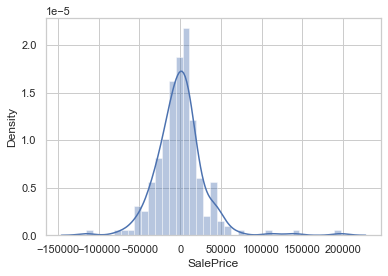

In [82]:
    # Let's plot the distribution plot and the Gaussian plot

    sns.distplot(y_test-y_pred)
    plt.show()


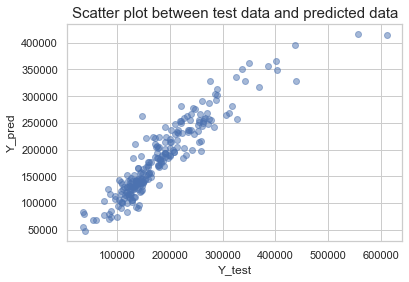

In [83]:
# Let' plot the Scatter plot between test data and predicted data

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [84]:
#Ridge Regressor is giving us minimum Rmse score so we choose it as our final model.
# Let's save our best model

import joblib
joblib.dump(RG,'Housing_Price_Project.pkl')

['Housing_Price_Project.pkl']

In [85]:
# Let;s load our save model

model=joblib.load('Housing_Price_Project.pkl')

In [86]:
# Let's Test our save model

import sys
nums= model.predict(x1)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[267024.89858855 183454.80966637 222086.89436916 150766.19077937
 306618.63511817 -23704.1888519  178130.15891875 240620.39657804
 227402.52210796 181511.37251253  15500.09561548 146967.76103107
 122115.83529715 214921.4306931  282912.60528471 139733.05168659
 106724.19259863 130289.52535583 233131.95198008 232061.34991147
 155315.59710224 188639.08600128 189401.89550983  23188.99844787
  90149.31494836 144999.96794735 230526.97293953 170234.12315549
 215405.6129525   60105.82096911 116635.45485842 223630.63084166
 239545.56504938 185136.51532253  82084.27020433 229024.72265649
 303582.4428401  121496.38194719 222721.78550984 100080.50749255
  91296.13269787 281606.628903   222058.4346966  204302.83651417
 155596.67023666  75651.95607555 111325.07453877 -54123.93667329
 205870.04133741 224434.52572444 136930.14555443 184378.74994168
  80899.44369785  -9606.46739087 283353.35836832 153901.55028381
 120981.84649179 255458.17475491 170583.07123347 244348.16006052
  69179.528309   251836.0